![alt text](Turtle_Games_Logo.png "Title")

# GitHub Link

# <div align="center"> Import

## Libraries

In [1]:
# Import necessary packages.

import numpy as np
import pandas as pd

import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.formula.api import ols

import matplotlib.pyplot as plt

import sklearn
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression

import warnings  
warnings.filterwarnings('ignore')

## Data

In [2]:
# Import .csv data to DataFrame.
reviews = pd.read_csv('turtle_reviews.csv')

# View DataFrame.
print(reviews.shape)
reviews.head()

(2000, 11)


gender  age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
0    Male   18              12.30                      39             210   
1    Male   23              12.30                      81             524   
2  Female   22              13.12                       6              40   
3  Female   25              13.12                      77             562   
4  Female   33              13.94                      40             366   

  education language platform  product  \
0  graduate       EN      Web      453   
1  graduate       EN      Web      466   
2  graduate       EN      Web      254   
3  graduate       EN      Web      263   
4  graduate       EN      Web      291   

                                              review  \
0  When it comes to a DM's screen, the space on t...   
1  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2  Nice art, nice printing.  Why two panels are f...   
3  Amazing buy! Bought it as a gift for our new d...   
4  As my review of GF9's previous screens these w...   

                                             summary  
0  The fact that 50% of this space is wasted on a...  
1  Another worthless Dungeon Master's screen from...  
2                    pretty, but also pretty useless  
3                                         Five Stars  
4                                         Money trap

# <div align="center"> Sense-Check the Data

### Column Metadata

- `gender` - The gender of the customer.


- `age` - Age of the customer in years.


- `remuneration (k£)` - Total income per customer per year in pounds, where k=1000.                           


- `spending_score (1-100)` - A score is assigned to the customer by Turtle Games based on the customer’s spending nature and behaviour. The value ranges between 1 and 100.


- `loyalty_points` -  A score based on the point value of the purchase, converting the monetary value to point and the point value of an action (purchase).


- `education` - Level of qualification that the customer obtained.


- `language` - All the reviews were in English.


- `platform` - The console platform that products are designed for.


- `product` - Unique code allocated to product based on the item description.


- `review` - Online reviews submitted by customers who purchased and used the products.


- `summary` - Summary of the customer’s review.

### Missing Values

In [3]:
# Create a new DataFrame and use the .isna() function to find missing values.
                  # .any(axis=1) tells Python to count instances of NaN values.
                       # axis=1 indicates column.
reviews_na = reviews[reviews.isna().any(axis = 1)]

# View the shape of the DataFrame.
reviews_na.shape

(0, 11)

The output shows there to be **0** rows with **null values** within the **11** columns.

### Metadata

In [4]:
# View the metadata for the DataFrame.
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  2000 non-null   object 
 1   age                     2000 non-null   int64  
 2   remuneration (k£)       2000 non-null   float64
 3   spending_score (1-100)  2000 non-null   int64  
 4   loyalty_points          2000 non-null   int64  
 5   education               2000 non-null   object 
 6   language                2000 non-null   object 
 7   platform                2000 non-null   object 
 8   product                 2000 non-null   int64  
 9   review                  2000 non-null   object 
 10  summary                 2000 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 172.0+ KB


### Descriptive Statistics

In [5]:
# View the Descriptive Statistics of the DataFrame.
reviews.describe().round(2)

age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
count  2000.00            2000.00                 2000.00         2000.00   
mean     39.49              48.08                   50.00         1578.03   
std      13.57              23.12                   26.09         1283.24   
min      17.00              12.30                    1.00           25.00   
25%      29.00              30.34                   32.00          772.00   
50%      38.00              47.15                   50.00         1276.00   
75%      49.00              63.96                   73.00         1751.25   
max      72.00             112.34                   99.00         6847.00   

        product  
count   2000.00  
mean    4320.52  
std     3148.94  
min      107.00  
25%     1589.25  
50%     3624.00  
75%     6654.00  
max    11086.00

- `age`:
    - Average = **39**
    - Youngest = **17**
    - Oldest = **72**
    
    
- `renumeration` / `Yealy Income`:
    - Average = **£48,080**
    - Lowest = **£12,300**
    - Highest = **£112,340**
    
    
- `spending_score`:
    - Average = **50**
    - Lowest = **1**
    - Highest = **99**
    

- `loyalty_points`:
    - Average = **1,578**
    - Lowest = **25**
    - Highest = **6,847**
    
    
- There are no obvious signs of distinct outliers.
    - The highest / max `renumeration` (**n = £112,430**) is particularly high, but yearly salary is a naturally wide-ranging variable, so I do not consider it an anomaly.

## Remove Redundant Columns

As all reviews were in English and obtained via the Turtle Games website, the `language` and `platform` columns add no value and are, therefore, redundant.

In [6]:
# Drop unnecessary columns.
reviews = reviews.drop(columns = ['language', 'platform'])

# View DataFrame.
reviews.head()

gender  age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
0    Male   18              12.30                      39             210   
1    Male   23              12.30                      81             524   
2  Female   22              13.12                       6              40   
3  Female   25              13.12                      77             562   
4  Female   33              13.94                      40             366   

  education  product                                             review  \
0  graduate      453  When it comes to a DM's screen, the space on t...   
1  graduate      466  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2  graduate      254  Nice art, nice printing.  Why two panels are f...   
3  graduate      263  Amazing buy! Bought it as a gift for our new d...   
4  graduate      291  As my review of GF9's previous screens these w...   

                                             summary  
0  The fact that 50% of this space is wasted on a...  
1  Another worthless Dungeon Master's screen from...  
2                    pretty, but also pretty useless  
3                                         Five Stars  
4                                         Money trap

## Rename Columns

In [7]:
# Rename columns for easier reference.
reviews = reviews.rename(columns = {'remuneration (k£)' : 'renumeration',
                                    'spending_score (1-100)' : 'spending_score'})

# View the DataFrame.
reviews.head()

gender  age  renumeration  spending_score  loyalty_points education  \
0    Male   18         12.30              39             210  graduate   
1    Male   23         12.30              81             524  graduate   
2  Female   22         13.12               6              40  graduate   
3  Female   25         13.12              77             562  graduate   
4  Female   33         13.94              40             366  graduate   

   product                                             review  \
0      453  When it comes to a DM's screen, the space on t...   
1      466  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2      254  Nice art, nice printing.  Why two panels are f...   
3      263  Amazing buy! Bought it as a gift for our new d...   
4      291  As my review of GF9's previous screens these w...   

                                             summary  
0  The fact that 50% of this space is wasted on a...  
1  Another worthless Dungeon Master's screen from...  
2                    pretty, but also pretty useless  
3                                         Five Stars  
4                                         Money trap

## Export DataFrame as .csv

In [8]:
# Save reviews as a .csv file.
reviews.to_csv('turtle_reviews_clean.csv', index = False)

# <div align="center"> Import Cleaned Data

In [9]:
# Import .csv to DataFrame.
reviews_c = pd.read_csv('turtle_reviews_clean.csv')

# View DataFrame.
print(reviews_c.shape)
reviews_c.head()

(2000, 9)


gender  age  renumeration  spending_score  loyalty_points education  \
0    Male   18         12.30              39             210  graduate   
1    Male   23         12.30              81             524  graduate   
2  Female   22         13.12               6              40  graduate   
3  Female   25         13.12              77             562  graduate   
4  Female   33         13.94              40             366  graduate   

   product                                             review  \
0      453  When it comes to a DM's screen, the space on t...   
1      466  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2      254  Nice art, nice printing.  Why two panels are f...   
3      263  Amazing buy! Bought it as a gift for our new d...   
4      291  As my review of GF9's previous screens these w...   

                                             summary  
0  The fact that 50% of this space is wasted on a...  
1  Another worthless Dungeon Master's screen from...  
2                    pretty, but also pretty useless  
3                                         Five Stars  
4                                         Money trap

## <div align="center"> Sense-Check the Data

### Missing Values

In [10]:
# Create a new DataFrame and use the .isna() function to find missing values.
                  # .any(axis=1) tells Python to count instances of NaN values.
                       # axis=1 indicates column.
reviews_c_na = reviews_c[reviews_c.isna().any(axis = 1)]

# View the shape of the DataFrame.
reviews_c_na.shape

(0, 9)

### Metadata

In [11]:
# View the metadata for the DataFrame.
reviews_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          2000 non-null   object 
 1   age             2000 non-null   int64  
 2   renumeration    2000 non-null   float64
 3   spending_score  2000 non-null   int64  
 4   loyalty_points  2000 non-null   int64  
 5   education       2000 non-null   object 
 6   product         2000 non-null   int64  
 7   review          2000 non-null   object 
 8   summary         2000 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 140.8+ KB


# <div align="center"> Simple Linear Regreession

## Age & Loyalty Points

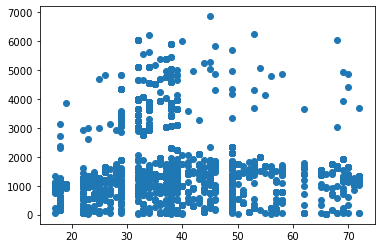

In [12]:
# Create a scatterplot to glean linear relationship.
plt.scatter(x = 'age', y = 'loyalty_points',
            data = reviews_c)

In [13]:
# Define the dependent variable.
y = reviews_c['loyalty_points'].values.reshape(-1, 1) 

# Define the independent variable.
x = (reviews_c['age']).values.reshape(-1, 1)

In [14]:
# Specify the model.
lm = LinearRegression()

# Fit the model.
lm.fit(x, y)

LinearRegression()

In [15]:
# Create  the subset (50/50); 
# Control the shuffling/avoid variation in values between variable.
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    train_size = 0.5,
                                                    random_state = 100)

In [16]:
# Predict the training set values.
y_pred = lm.predict(x_train) 

# View the output
y_pred

array([[1588.04394885],
       [1588.04394885],
       [1551.9287025 ],
       [1636.19761065],
       [1600.0823643 ],
       [1604.09516945],
       [1608.1079746 ],
       [1600.0823643 ],
       [1515.81345615],
       [1523.83906645],
       [1576.0055334 ],
       [1511.800651  ],
       [1455.6213789 ],
       [1584.0311437 ],
       [1555.94150765],
       [1648.2360261 ],
       [1584.0311437 ],
       [1535.8774819 ],
       [1455.6213789 ],
       [1523.83906645],
       [1588.04394885],
       [1523.83906645],
       [1608.1079746 ],
       [1559.9543128 ],
       [1604.09516945],
       [1576.0055334 ],
       [1584.0311437 ],
       [1584.0311437 ],
       [1664.2872467 ],
       [1567.9799231 ],
       [1539.89028705],
       [1584.0311437 ],
       [1539.89028705],
       [1632.1848055 ],
       [1668.30005185],
       [1507.78784585],
       [1455.6213789 ],
       [1584.0311437 ],
       [1620.14639005],
       [1620.14639005],
       [1600.0823643 ],
       [1620.146

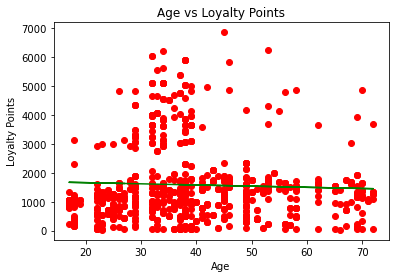

In [17]:
# Create a scatterplot with regression line.
plt.scatter(x_train, y_train, color = 'red')  
plt.plot(x_train, y_pred, color = 'green')

# Set the title and legends for the graph.  
plt.title("Age vs Loyalty Points")
plt.xlabel("Age")
plt.ylabel("Loyalty Points") 

# Print the graph. 
plt.show()

### Accuracy of Train Data

In [18]:
# Print R-squared value of the train data.
print("R-squared value: ", lm.score(x_train, y_train)) 

# Print the intercept value.
print("Intercept value: ", lm.intercept_) 

# Print the coefficient value.
print("Coefficient value: ", lm.coef_)

R-squared value:  -0.0014744277749496604
Intercept value:  [1736.5177394]
Coefficient value:  [[-4.01280515]]


- $R^2$ is very weak, indicating that loyalty points are not heavily explained by **age**.
- **Coefficient** indicates that for each year increase in age, a customer will have **-4** loyalty points.

### Test Data

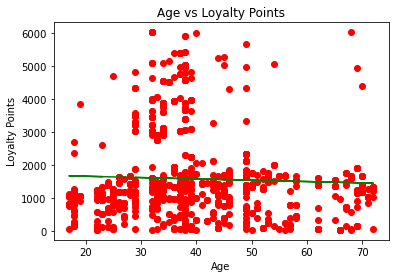

In [19]:
# Predict the test set values.
y_pred_test = lm.predict(x_test) 

# Create a scatterplot with regression line.
plt.scatter(x_test, y_test, color = 'red') 
plt.plot(x_test, y_pred_test, color = 'green')

# Set the title and legends for the graph.  
plt.title("Age vs Loyalty Points")
plt.xlabel("Age")
plt.ylabel("Loyalty Points") 

# Print the graph. 
plt.show()

### Accuracy of Test Data

In [20]:
# Print R-squared value of the test data.
print("R-squared value: ", lm.score(x_test, y_test)) 

# Print the intercept value.
print("Intercept value: ", lm.intercept_) 

# Print the coefficient value.
print("Coefficient value: ", lm.coef_)

R-squared value:  0.004420549066297408
Intercept value:  [1736.5177394]
Coefficient value:  [[-4.01280515]]


- $R^2$ has improved, but not by a significant margin.
    - This indicates that the model is not particularly strong in its predictive power.

In [21]:
# Use the predict() method with an array to call the predicted
# loyalty points for each age.
predicted_lp = lm.predict([[20], [25], [30], [35], [40], [45]])  

# Print the results.
print(f"Predicted Loyalty Points:\n{predicted_lp}")

Predicted Loyalty Points:
[[1656.2616364 ]
 [1636.19761065]
 [1616.1335849 ]
 [1596.06955915]
 [1576.0055334 ]
 [1555.94150765]]


## Renumeration & Loyalty Points

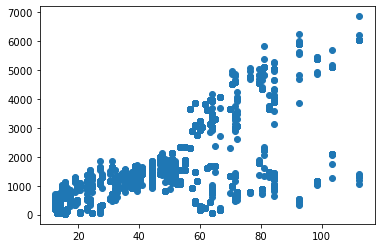

In [22]:
# Create a scatterplot to glean linear relationship.
plt.scatter(x = 'renumeration', y = 'loyalty_points',
            data = reviews_c)

### Transform Data

In [23]:
# Copy the dataframe.
reviews_sqrt = reviews_c.copy()

# Transform the relevant columns.
reviews_sqrt['renumeration_sqrt'] = np.sqrt(reviews_sqrt['renumeration'])
reviews_sqrt['loyalty_points_sqrt'] = np.sqrt(reviews_sqrt['loyalty_points'])

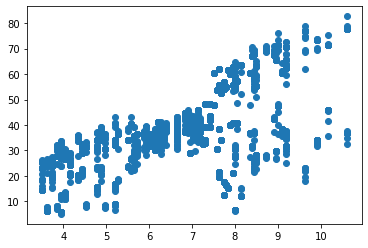

In [24]:
# Create a scatterplot to glean linear relationship.
plt.scatter(x = 'renumeration_sqrt', y = 'loyalty_points_sqrt',
            data = reviews_sqrt)

In [25]:
# Define the dependent variable.
y = reviews_sqrt['loyalty_points_sqrt'].values.reshape(-1, 1) 

# Define the independent variable.
x = (reviews_sqrt['renumeration_sqrt']).values.reshape(-1, 1)

In [26]:
# Specify the model.
lm = LinearRegression()

# Fit the model.
lm.fit(x, y)

LinearRegression()

In [27]:
# Create  the subset (50/50); 
# Control the shuffling/avoid variation in values between variable.
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    train_size = 0.5,
                                                    random_state = 100)

In [28]:
# Predict the training set values.
y_pred = lm.predict(x_train) 

# View the output
y_pred

array([[42.57613358],
       [25.86102961],
       [25.86102961],
       [19.34071641],
       [46.23665868],
       [41.98522278],
       [49.37940448],
       [42.86859425],
       [44.01937989],
       [25.86102961],
       [45.96524176],
       [36.24588388],
       [37.92544307],
       [50.38416778],
       [43.73446802],
       [22.28192298],
       [19.96223062],
       [32.63500766],
       [54.45113653],
       [36.24588388],
       [25.86102961],
       [33.75784733],
       [49.88427335],
       [24.38934201],
       [44.58384442],
       [45.96524176],
       [41.0832479 ],
       [41.68668947],
       [33.38765879],
       [42.28169005],
       [32.25226602],
       [36.24588388],
       [32.25226602],
       [30.67487078],
       [36.24588388],
       [46.50652018],
       [31.07652591],
       [21.1526628 ],
       [49.12505758],
       [33.38765879],
       [21.1526628 ],
       [34.48659321],
       [34.1241182 ],
       [46.23665868],
       [30.26803236],
       [30

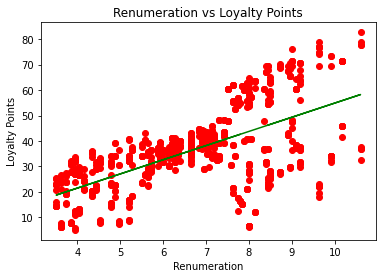

In [29]:
# Create a scatterplot with regression line.
plt.scatter(x_train, y_train, color = 'red')  
plt.plot(x_train, y_pred, color = 'green')

# Set the title and legends for the graph.  
plt.title("Renumeration vs Loyalty Points")
plt.xlabel("Renumeration")
plt.ylabel("Loyalty Points") 

# Print the graph. 
plt.show()

### Accuracy of Train data

In [30]:
# Print R-squared value of the train data.
print("R-squared value: ", lm.score(x_train, y_train)) 

# Print the intercept value.
print("Intercept value: ", lm.intercept_) 

# Print the coefficient value.
print("Coefficient value: ", lm.coef_)

R-squared value:  0.3572748408214318
Intercept value:  [-0.853786]
Coefficient value:  [[5.5752743]]


- $R^2$ is fairly weak, indicating that loyalty points are not heavily explained by **renumeration** alone.
- **Coefficient** indicates that for each £1,000 increase in salary, a customer will gain **5.5** loyalty points.

### Test Data 

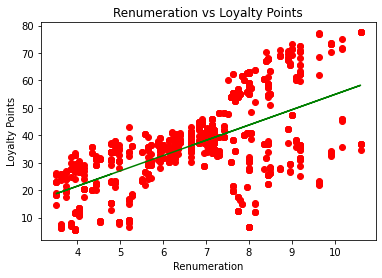

In [31]:
# Predict the test set values.
y_pred_test = lm.predict(x_test) 

# Create a scatterplot with regression line.
plt.scatter(x_test, y_test, color = 'red') 
plt.plot(x_test, y_pred_test, color = 'green')

# Set the title and legends for the graph.  
plt.title("Renumeration vs Loyalty Points")
plt.xlabel("Renumeration")
plt.ylabel("Loyalty Points") 

# Print the graph. 
plt.show()

### Accuracy of Test Data

In [32]:
# Print R-squared value of the test data.
print("R-squared value: ", lm.score(x_test, y_test)) 

# Print the intercept value.
print("Intercept value: ", lm.intercept_) 

# Print the coefficient value.
print("Coefficient value: ", lm.coef_)

R-squared value:  0.4103133494179977
Intercept value:  [-0.853786]
Coefficient value:  [[5.5752743]]


- $R^2$ has improved, but not by a significant margin.
    - This indicates that the model is not particularly strong in its predictive power.

### Predictions

In [33]:
# Use the predict() method with an array to call the predicted
# loyalty points for each salary.
predicted_lp = lm.predict([[20], [25], [30], [35], [40], [45]])  

# Print the results.
print(f"Predicted Loyalty Points:\n{predicted_lp}")

Predicted Loyalty Points:
[[110.65169995]
 [138.52807144]
 [166.40444292]
 [194.28081441]
 [222.1571859 ]
 [250.03355738]]


## Spending Score & Loyalty Points

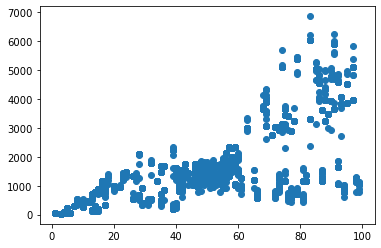

In [34]:
# Create a scatterplot to glean linear relationship.
plt.scatter(x = 'spending_score', y = 'loyalty_points',
            data = reviews_c)

### Transform Data

In [35]:
# Transform the relevant columns.
reviews_sqrt['spending_score_sqrt'] = np.sqrt(reviews_sqrt['spending_score'])

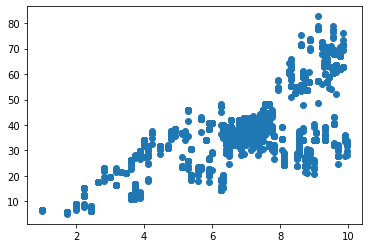

In [36]:
# Create a scatterplot to glean linear relationship.
plt.scatter(x = 'spending_score_sqrt', y = 'loyalty_points_sqrt',
            data = reviews_sqrt)

In [37]:
# Define the dependent variable.
y = reviews_sqrt['loyalty_points_sqrt'].values.reshape(-1, 1) 

# Define the independent variable.
x = (reviews_sqrt['spending_score_sqrt']).values.reshape(-1, 1)

In [38]:
# Specify the model.
lm = LinearRegression()

# Fit the model.
lm.fit(x, y)

LinearRegression()

In [39]:
# Create  the subset (50/50); 
# Control the shuffling/avoid variation in values between variable.
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    train_size = 0.5,
                                                    random_state = 100)

In [40]:
# Predict the training set values.
y_pred = lm.predict(x_train) 

# View the output
y_pred

array([[45.89031194],
       [42.28349808],
       [30.7775251 ],
       [47.43813956],
       [42.96210431],
       [45.57436133],
       [53.17614218],
       [52.07968464],
       [32.16261302],
       [20.54428922],
       [24.44736553],
       [38.70986775],
       [40.17801282],
       [49.81360958],
       [21.92465954],
       [43.9601268 ],
       [47.13268883],
       [38.33391852],
       [48.04314766],
       [40.89205335],
       [30.7775251 ],
       [41.59367293],
       [44.61291795],
       [12.49965848],
       [52.07968464],
       [24.44736553],
       [41.24437534],
       [52.63079906],
       [40.17801282],
       [14.68866906],
       [36.39507258],
       [40.17801282],
       [34.76497776],
       [43.63002182],
       [39.08214892],
       [21.24598707],
       [40.17801282],
       [20.54428922],
       [50.6753949 ],
       [38.70986775],
       [53.7158916 ],
       [40.17801282],
       [41.59367293],
       [19.81705018],
       [32.16261302],
       [43

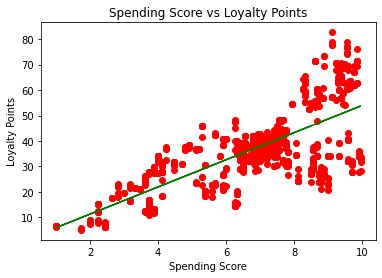

In [41]:
# Create a scatterplot with regression line.
plt.scatter(x_train, y_train, color = 'red')  
plt.plot(x_train, y_pred, color = 'green')

# Set the title and legends for the graph.  
plt.title("Spending Score vs Loyalty Points")
plt.xlabel("Spending Score")
plt.ylabel("Loyalty Points") 

# Print the graph. 
plt.show()

### Accuracy of Train Data

In [42]:
# Print R-squared value of the train data.
print("R-squared value: ", lm.score(x_train, y_train)) 

# Print the intercept value.
print("Intercept value: ", lm.intercept_) 

# Print the coefficient value.
print("Coefficient value: ", lm.coef_)

R-squared value:  0.5049837700429167
Intercept value:  [0.55195143]
Coefficient value:  [[5.34317703]]


- $R^2$ is fairly weak, indicating that loyalty points are not heavily explained by **spending score** alone.
- **Coefficient** indicates that for each unit increase in spending score, a customer will gain **5.3** loyalty points.

### Test Data

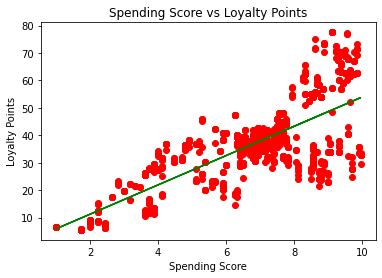

In [43]:
# Predict the test set values.
y_pred_test = lm.predict(x_test) 

# Create a scatterplot with regression line.
plt.scatter(x_test, y_test, color = 'red') 
plt.plot(x_test, y_pred_test, color = 'green')

# Set the title and legends for the graph.  
plt.title("Spending Score vs Loyalty Points")
plt.xlabel("Spending Score")
plt.ylabel("Loyalty Points") 

# Print the graph. 
plt.show()

### Accuracy of Test Data

In [44]:
# Print R-squared value of the test data.
print("R-squared value: ", lm.score(x_test, y_test)) 

# Print the intercept value.
print("Intercept value: ", lm.intercept_) 

# Print the coefficient value.
print("Coefficient value: ", lm.coef_)

R-squared value:  0.5666534308982949
Intercept value:  [0.55195143]
Coefficient value:  [[5.34317703]]


- $R^2$ has improved, but not by a significant margin.
    - This indicates that the model is not particularly strong in its predictive power.

### Predictions

In [45]:
# Use the predict() method with an array to call the predicted
# loyalty points for each spending score.
predicted_lp = lm.predict([[20], [25], [30], [35], [40], [45]])  

# Print the results.
print(f"Predicted Loyalty Points:\n{predicted_lp}")

Predicted Loyalty Points:
[[107.41549198]
 [134.13137712]
 [160.84726225]
 [187.56314739]
 [214.27903253]
 [240.99491767]]


## Simple Linear Regression Analysis

- None of the simple linear regression (SLR) models proved to be particularly strong in their predictive power.


- Heteroscedasticity was found in each of the variables' relationships, which I attempted to curtail through transforming the data points. However, this did not transform the data to the point of acheiving satisfactory models.
    - This is often the case with SLR models as it is rarely the case that a variable is explained by just one other variable.


- I have therefore concluded that SLR models are not the most appropriate choice of analysis for this data set and will apply the more apt multiple linear regression to understand the relationship between **loyalty pooints** and the other variables available for analysis.

# <div align="center"> Multiple Linear Regression

### Define Variables

In [46]:
# Define the dependent variable.
y = reviews_c['loyalty_points']  

# Define the independent variables.
# Multiple indepentent variables = capital 'X'.
X = reviews_c[['age', 'renumeration', 'spending_score']]

### Fit the Model

In [47]:
# Fit the regression model.
mlr = linear_model.LinearRegression()

mlr.fit(X, y)

LinearRegression()

In [48]:
# Call the predictions for X (array).
mlr.predict(X)

array([ -252.52008641,  1238.47746341, -1308.43606252, ...,
        4434.8905332 ,  2066.35892261,  1575.56389984])

### Check the value of $R^2$, Intercept, and Coefficients

In [49]:
# Print the R-squared value (coefficient of determination).
print("R-squared: ", mlr.score(X,y))

# Print the intercept.
print("Intercept: ", mlr.intercept_)

# Print the coefficients.
print("Coefficients:")

# Map a similar index of multiple containers (to be used as a single entity).
list(zip(X, mlr.coef_))

R-squared:  0.8399114912748795
Intercept:  -2203.059751307901
Coefficients:


[('age', 11.060658711843349),
 ('renumeration', 34.00838549260249),
 ('spending_score', 34.18319657763366)]

- $R^2$: Roughly **84%** of the variation in customers' loyalty points can be explained by the **age**, **renumeration**, and **spending_score** variables.
    - This is an encouraging benchmark for the initial MLR Model.
        
        
- **Intercept** isn't important here.


- **Coefficients**:
    - If customers had the same **renumeration** and **spending_score** values, then a 1-unit increase in the **age** vairable would estimate an **11**-unit increase in **loyalty_points**.
    - If customers had the same **age** and **spending_score** values, then a 1-unit increase in the **renumeration** vairable would estimate an **34**-unit increase in **loyalty_points**.
    - If customers had the same **age** and **renumeration** values, then a 1-unit increase in the **spending_score** vairable would estimate an **34**-unit increase in **loyalty_points**.

### Train and test subsets

In [50]:
# Split the data in 'train' (80%) and 'test' (20%) sets.
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y,
                                                                            test_size = 0.20,
                                                                            random_state = 5)

In [51]:
# Training the model using the 'statsmodel' OLS library.
# Fit the model with the added constant.
model = sm.OLS(y_train, sm.add_constant(X_train)).fit()

# Set the predicted response vector.
y_pred = model.predict(sm.add_constant(X_test))

# Call a summary of the model.
print_model = model.summary()

# Print the summary.
print(print_model)

                            OLS Regression Results                            
Dep. Variable:         loyalty_points   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     2692.
Date:                Sun, 23 Apr 2023   Prob (F-statistic):               0.00
Time:                        10:12:42   Log-Likelihood:                -12227.
No. Observations:                1600   AIC:                         2.446e+04
Df Residuals:                    1596   BIC:                         2.448e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -2203.3411     58.253    -37.

- **No. Observations**: 1,600


- $R^2$: 0.835
    - very similar to original value (0.839).
    
    
- **Adj. $R^2$**: 0.835
    - This is a useful way of penalising model for complexity.
    
    
- **P>|t|** / ***p*-value**:
    - All three show to be highly signnificant (0.000)
    
    
- **confidence intervals**:
    - We are 95% confident that the true sensetivity of customer `loyalty_points` to `age` is between **9.083 - 12.787**
    - We are 95% confident that the true sensetivity of customer `loyalty_points` to `renumeration` is between **32.575 - 34.747**
    - We are 95% confident that the true sensetivity of customer `loyalty_points` to `spending_score` is between **33.279 - 35.253**

### Run a Regression Test

In [52]:
# Specify the model.
mlr = LinearRegression()

# Fit the model. We can only fit the model with the training data set.
mlr.fit(X_train, y_train)

LinearRegression()

In [53]:
# Call the predictions for X in the test set.
y_pred_mlr = mlr.predict(X_test)

# Print the predictions.
print("Prediction for train set: {}".format(y_pred_mlr))

Prediction for train set: [ 1.39464002e+03  3.42722127e+03  1.64827702e+03  1.73471263e+03
  8.78436414e+02  1.10385877e+03  3.37583217e+03  1.17368074e+03
  3.24736342e+03  2.23180070e+03 -2.44944699e+02  4.10358129e+02
  2.12783527e+02  9.63165267e+02  1.28320189e+03  1.77257837e+03
 -1.43799603e+02  1.63483668e+03  3.18353398e+03  2.04590612e+03
  1.60641528e+03  2.11803797e+03  1.46031816e+03 -7.21777196e+02
  4.39477305e+03  2.96179966e+03  3.42723600e+03  1.34009235e+03
 -4.44661239e+02  1.33626775e+03  1.41790286e+03  4.58138911e+03
  1.29316633e+03  3.83420234e+03  1.27602323e+03  1.88201997e+03
  5.94541904e+01  4.00594554e+02  2.19418054e+03  6.28463350e+02
  1.50093432e+03  8.28366550e+02  1.08041516e+03  1.63483668e+03
 -8.60817496e+02  1.34238749e+03  1.10249534e+03  1.42146714e+03
 -9.54686183e+02  1.92394653e+03  1.37765359e+03 -8.54393252e+02
  2.97230292e+03  1.65861425e+03 -2.56101162e+02  1.57640549e+03
  1.50963897e+03  1.36293474e+03  1.40406027e+03  3.96782965e+03

In [54]:
# Print the R-squared value for the test set.
# *100 = express as percentage.
print("R-squared: ", round(mlr.score(X_test, y_test)*100, 2), "%")

R-squared:  85.31 %


## Check for Multicollinearity

In [55]:
# Add a constant.
x_temp = sm.add_constant(X_train)  

# Create an empty DataFrame. 
vif = pd.DataFrame() 

# Calculate the 'vif' for each value.
vif["VIF Factor"] = [variance_inflation_factor(x_temp.values, 
                                               i) for i in range(x_temp.values.shape[1])]  


# Create the feature columns.
vif['features'] = x_temp.columns  

# Print the values to two decimal points.
print(vif.round(2))

   VIF Factor        features
0       21.29           const
1        1.05             age
2        1.00    renumeration
3        1.06  spending_score


- `VIF Factor` is a function of the correlation coefficient between `age`, `renumeration` and `spending_score`.
    - The stronger the correlation between each independent variable, the larger the number would be.
    - The closer the number is to 1 the lower the correlation between independent variables.
        - **1.05**, **1.00**, and **1.06** are low - therefore, there is little chance of multicolinearity.

## Determine Homoscedasticity

In [56]:
# Run the Breusch-Pagan test function on the model residuals and x-variables.
model = sms.het_breuschpagan(model.resid, model.model.exog)

# Print the results of the Breusch-Pagan test.
terms = ['LM stat', 'LM Test p-value', 'F-stat', 'F-test p-value']
print(dict(zip(terms, model)))

{'LM stat': 30.386096853867883, 'LM Test p-value': 1.1446326520923542e-06, 'F-stat': 10.298968105376614, 'F-test p-value': 1.026336544830792e-06}


- `LM Test *p*-value` = 1.14
    - 1.14 > 0.005, therefore we assume homoscedasticity.

# <div align="center"> K-Means Clustering

## Import Libraries

In [57]:
# Import necessary libraries.
import matplotlib.cm as cm
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from scipy.spatial.distance import cdist

## Prepare Data

In [58]:
# Create a new DataFrame containing the 'remuneration' and 'spending_score' columns.
rcc = reviews_c[['renumeration', 'spending_score']]

# view the DataFrame.
rcc.head()

renumeration  spending_score
0         12.30              39
1         12.30              81
2         13.12               6
3         13.12              77
4         13.94              40

In [59]:
# View descriptive Statistics.
rcc.describe().round(2)

renumeration  spending_score
count       2000.00         2000.00
mean          48.08           50.00
std           23.12           26.09
min           12.30            1.00
25%           30.34           32.00
50%           47.15           50.00
75%           63.96           73.00
max          112.34           99.00

## Visualise the Data

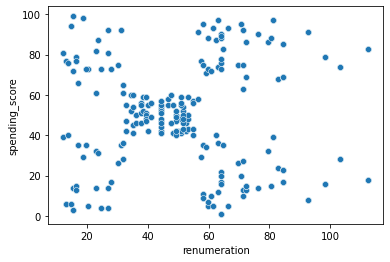

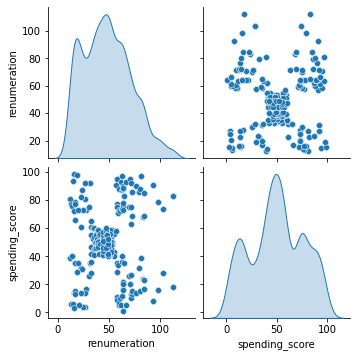

In [60]:
# Create a scatterplot with Seaborn.
sns.scatterplot(x = 'renumeration',
                y = 'spending_score',
                data = rcc,)

# Create a pairplot with Seaborn.
x = rcc[['renumeration', 'spending_score']]

sns.pairplot(rcc,
             vars = x,
             diag_kind = 'kde')

- *k*-means is very sensetive to outliers.
    - Looking at the first scatter plot of the **rcc** `renumeration` and `spending_score` data, it may initially appear that there could be some outliers in the `renumeration` data. However, the descriptive statistics show there not to be any obvious erroneous data points, and as `renumeration` (**annual income**) is a naturally wide-ranging variable, I will not remove any data.

## Determine the optimal number of clusters for k-means clustering

### Elbow Method

The Within-Cluster-Sum of Standard Errors (WCSS) is calculated for each possible value of *k*. This is plotted with a line, and a bend (elbow) in the curve will appear where the WSS begins to diminish abruptly.

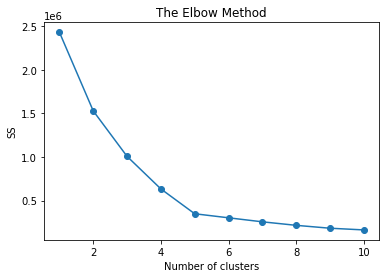

In [61]:
# Elbow chart to help decide on the number of optimal clusters.
# SS = 'Sum of Squares'.
ss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i,
                    init = 'k-means++', 
                    max_iter = 500,
                    n_init = 10,
                    random_state = 42)
    kmeans.fit(x)
    ss.append(kmeans.inertia_)

plt.plot(range(1, 11),
         ss,
         marker = 'o')

# Format Figure Attributes.
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("SS")

# View plot.
plt.show()

Based on the elbow method, the optimal number of clusters (k) is **5**.

### Silhouette Method

The silhouette method computes **silhouette coefficients** of each point that measure how much a point is similar to its own cluster compared to other clusters. It provides a succinct graphical representation of how well each object has been classified.

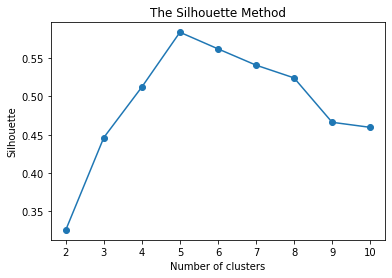

In [62]:
# Find the range of clusters to be used using silhouette method.
sil = []
kmax = 10

for k in range(2, kmax+1):
    kmeans_s = KMeans(n_clusters = k).fit(x)
    labels = kmeans_s.labels_
    sil.append(silhouette_score(x,
                                labels,
                                metric = 'euclidean'))

# Plot the silhouette method.
plt.plot(range(2, kmax+1),
         sil,
         marker = 'o')

# Format Figure Attributes.
plt.title("The Silhouette Method")
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette")

# View plot.
plt.show()

Both the **Elbow** and **Silhouette** methods suggest **5** to be the optimum number of clusters for *k*-means clustering.

However, I will evaluate the usefulness of the other values for *k* (**4** and **6**).

## Evaluate the model

## `k = 5`

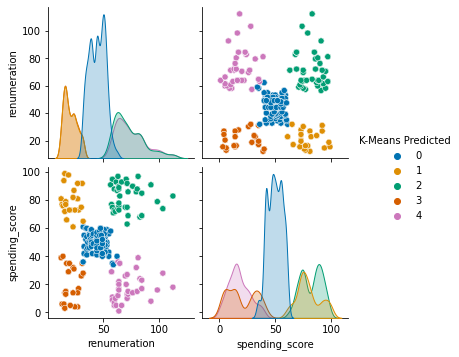

In [63]:
# Use five clusters.
kmeans = KMeans(n_clusters = 5, 
                max_iter = 15000,
                init = 'k-means++',
                random_state = 42).fit(x)

clusters = kmeans.labels_

x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x,
             hue = 'K-Means Predicted',
             palette = 'colorblind',
             diag_kind =  'kde')

In [64]:
# Check the number of observations per predicted class.
x['K-Means Predicted'].value_counts()

0    774
2    356
4    330
3    271
1    269
Name: K-Means Predicted, dtype: int64

In [65]:
# View the K-Means predicted.
print(x.head())

   renumeration  spending_score  K-Means Predicted
0         12.30              39                  3
1         12.30              81                  1
2         13.12               6                  3
3         13.12              77                  1
4         13.94              40                  3


### Visualise the Clusters

<AxesSubplot:xlabel='renumeration', ylabel='spending_score'>

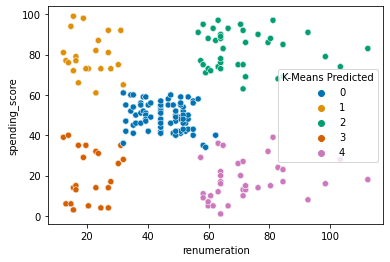

In [66]:
# Create a scatterplot.
sns.scatterplot(x = 'renumeration' , 
                y ='spending_score',
                data = x,
                hue = 'K-Means Predicted',
                palette = 'colorblind')

## `k = 4`

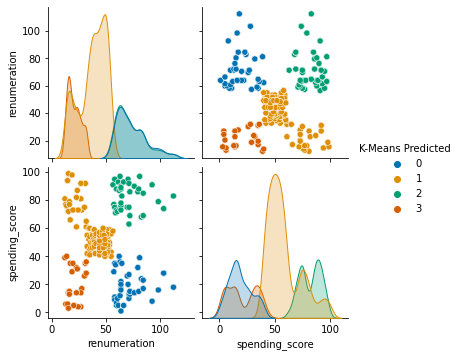

In [67]:
# Use four clusters.
kmeans = KMeans(n_clusters = 4, 
                max_iter = 15000,
                init = 'k-means++',
                random_state = 42).fit(x)

clusters = kmeans.labels_

x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x,
             hue = 'K-Means Predicted',
             palette = 'colorblind',
             diag_kind =  'kde')

In [68]:
# Check the number of observations per predicted class.
x['K-Means Predicted'].value_counts()

1    1013
2     356
0     351
3     280
Name: K-Means Predicted, dtype: int64

In [69]:
# View the K-Means predicted.
print(x.head())

   renumeration  spending_score  K-Means Predicted
0         12.30              39                  3
1         12.30              81                  1
2         13.12               6                  3
3         13.12              77                  1
4         13.94              40                  3


### Visualise the Clusters

<AxesSubplot:xlabel='renumeration', ylabel='spending_score'>

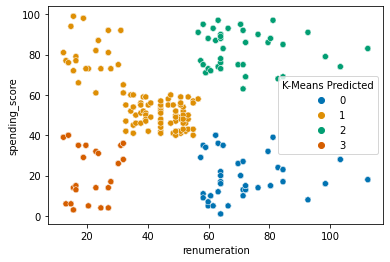

In [70]:
# Create a scatterplot.
sns.scatterplot(x = 'renumeration' , 
                y ='spending_score',
                data = x,
                hue = 'K-Means Predicted',
                palette = 'colorblind')

## `k = 6`

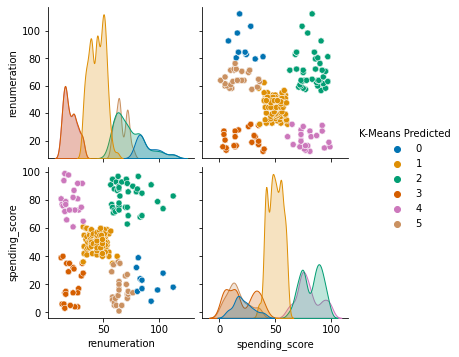

In [71]:
# Use six clusters.
kmeans = KMeans(n_clusters = 6, 
                max_iter = 15000,
                init = 'k-means++',
                random_state = 42).fit(x)

clusters = kmeans.labels_

x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x,
             hue = 'K-Means Predicted',
             palette = 'colorblind',
             diag_kind =  'kde')

In [72]:
# Check the number of observations per predicted class.
x['K-Means Predicted'].value_counts()

1    767
2    356
3    271
4    269
5    214
0    123
Name: K-Means Predicted, dtype: int64

In [73]:
# View the K-Means predicted.
print(x.head())

   renumeration  spending_score  K-Means Predicted
0         12.30              39                  3
1         12.30              81                  4
2         13.12               6                  3
3         13.12              77                  4
4         13.94              40                  3


### Visualise the Clusters

<AxesSubplot:xlabel='renumeration', ylabel='spending_score'>

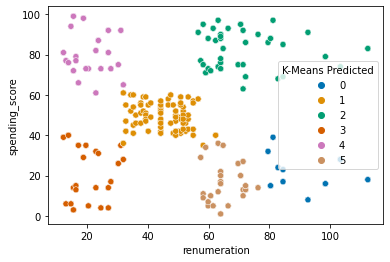

In [74]:
# Create a scatterplot.
sns.scatterplot(x = 'renumeration' , 
                y ='spending_score',
                data = x,
                hue = 'K-Means Predicted',
                palette = 'colorblind')

- For thoroughness of investigation, I did evaluate the usefulness of other possible *k*-values.
    - `k = 4` showed to combine obviously differing / distant data together which would not provide preicise enough predictions for the use-case.
    - `k = 6` showed to separate some previously-highlighted potential outliers into a distinct cluster. This may provide an increased accuracy for these specific customers, but this model may be overfit, and may become innaccurate with a larger dataset.
        - This may be useful to know for further evaluation of the model in the future.
    
    
- The original data scatter plot showed there to be **5** distinct spherical-shaped clusters of data points.
    - The **Elbow** and **Silhouette** methods confirmed that `k = 5` is the optimum number of clusters.

## Fit the Final Model

## `k = 5`

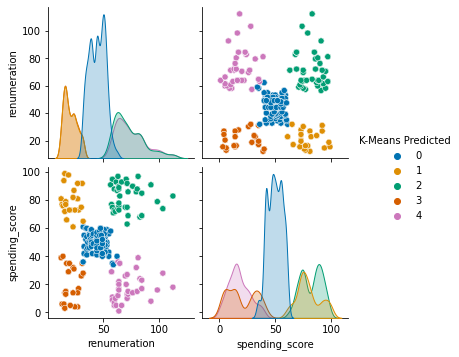

In [75]:
# Use five clusters.
kmeans = KMeans(n_clusters = 5, 
                max_iter = 15000,
                init = 'k-means++',
                random_state = 42).fit(x)

clusters = kmeans.labels_

x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x,
             hue = 'K-Means Predicted',
             palette = 'colorblind',
             diag_kind =  'kde')

In [76]:
# Check the number of observations per predicted class.
x['K-Means Predicted'].value_counts()

0    774
2    356
4    330
3    271
1    269
Name: K-Means Predicted, dtype: int64

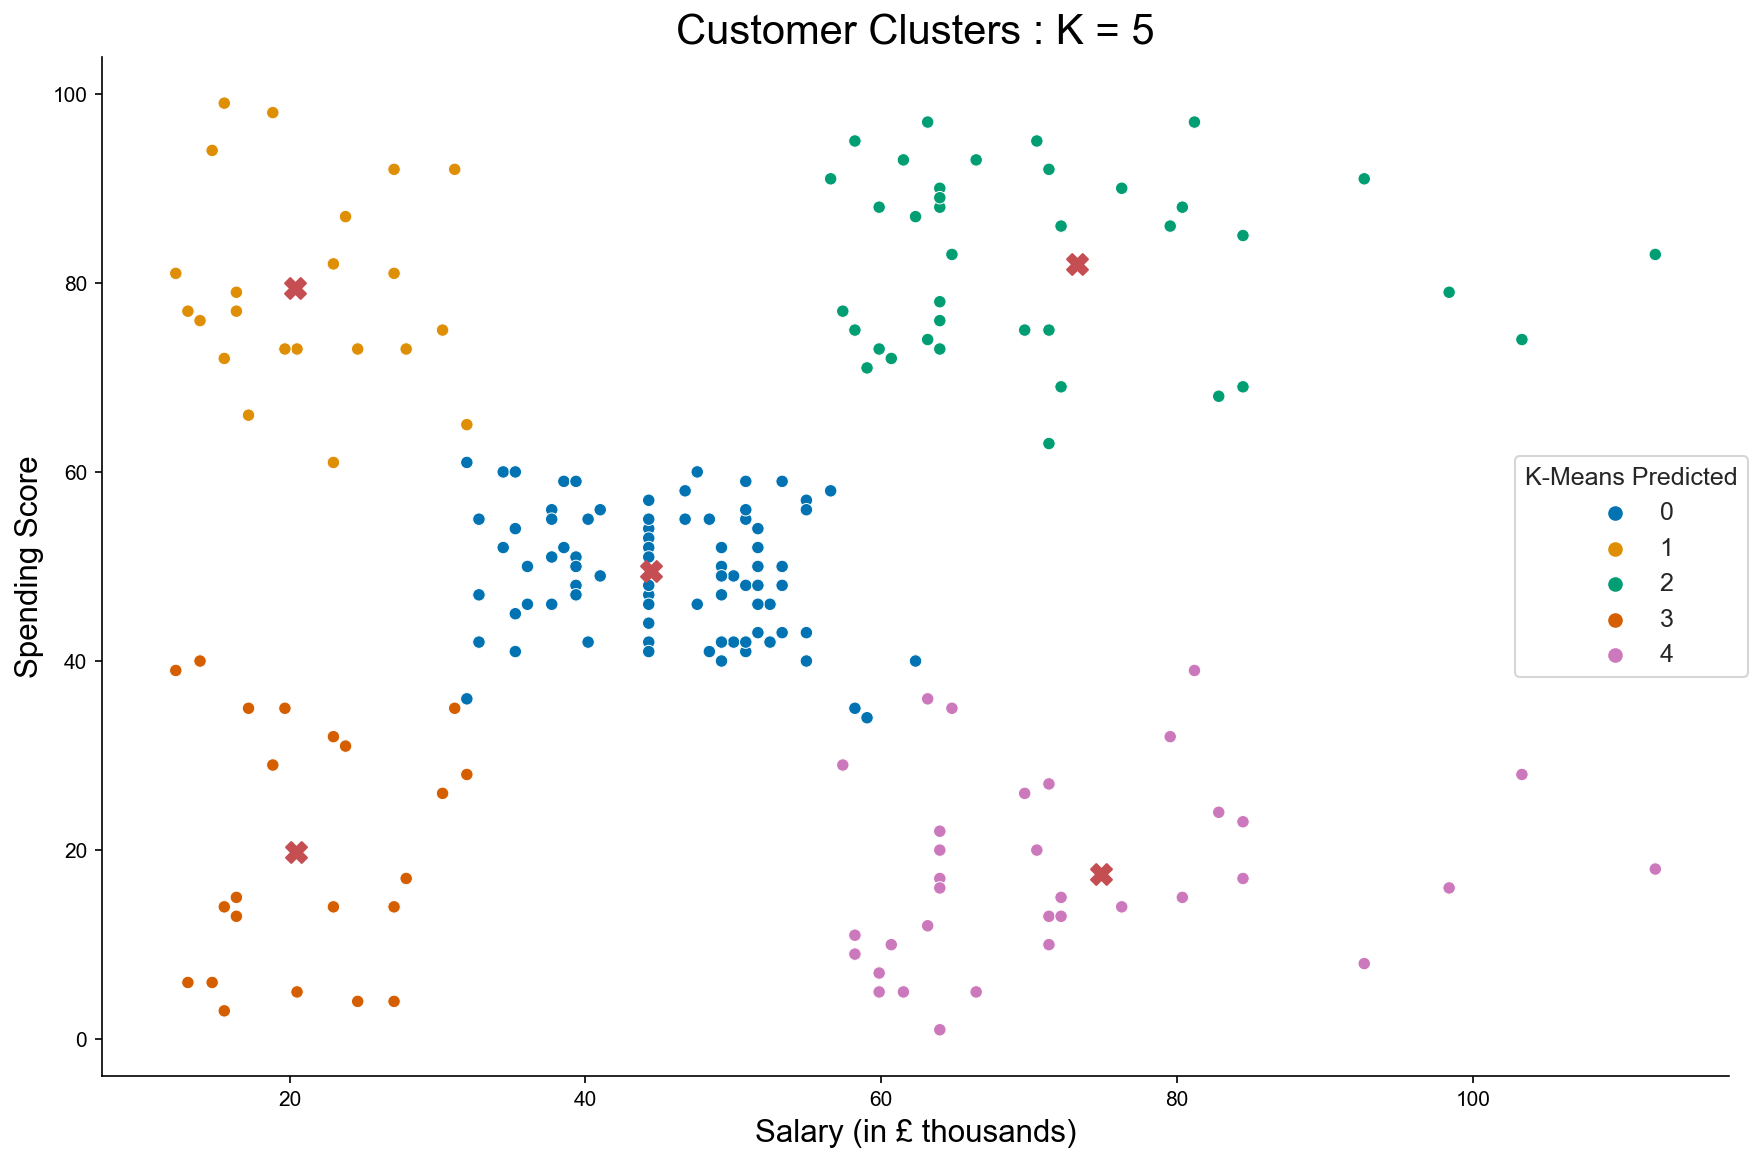

In [77]:
# Define figure.
fig, ax = plt.subplots(figsize = (14, 9),
                       dpi = 150)

# Create a scatterplot.
sns.scatterplot(x = 'renumeration' , 
                y ='spending_score',
                data = x,
                hue = 'K-Means Predicted',
                palette = 'colorblind')

# Format figure attributes.
plt.title('Customer Clusters : K = 5',
          fontsize = 20)
plt.xlabel('Salary (in £ thousands)', fontsize = 15)
plt.ylabel('Spending Score', fontsize = 15)
sns.despine()
sns.set(style = "white")
plt.legend(title = 'K-Means Predicted', fontsize = 12,
           bbox_to_anchor = (.95, .5), loc = 'center right', borderaxespad = -4)

# Add cluster centers.
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 
            marker = "X", c = "r", s = 100, label = "centroids")

# View plot.
plt.show()

# Save the plot.
fig.savefig('Turtle Games Customer Clusters (k = 5).jpg')

In [78]:
# View the predicted cluster centers.
kmeans.cluster_centers_

array([[44.41878553, 49.52971576,  1.03617571],
       [20.3536803 , 79.41635688,  4.        ],
       [73.2402809 , 82.00842697,  2.        ],
       [20.42435424, 19.76383764,  3.        ],
       [74.83121212, 17.42424242,  3.13636364]])

## Scaled Data

In [79]:
# Import scaling library.
from sklearn.preprocessing import MinMaxScaler

In [80]:
# Define scaler.
sc = MinMaxScaler((0, 1))

# Scale the data and create a new DataFrame.
x_scaled = rcc[['renumeration', 'spending_score']]
x_scaled = sc.fit_transform(x_scaled)
x_scaled = pd.DataFrame(x_scaled, columns = ['renumeration', 'spending_score'])

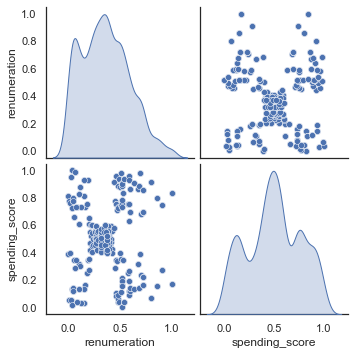

In [81]:
# Visualise data.
sns.pairplot(x_scaled,
             vars = x_scaled,
             diag_kind = 'kde')

### Elbow Method

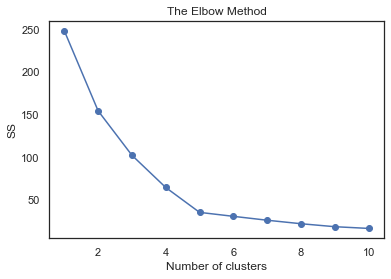

In [82]:
# Elbow chart to help decide on the number of optimal clusters.
# SS = 'Sum of Squares'.
ss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i,
                    init = 'k-means++', 
                    max_iter = 500,
                    n_init = 10,
                    random_state = 42)
    kmeans.fit(x_scaled)
    ss.append(kmeans.inertia_)

plt.plot(range(1, 11),
         ss,
         marker = 'o')

# Format Figure Attributes.
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("SS")

# View plot.
plt.show()

### Silhouette Method

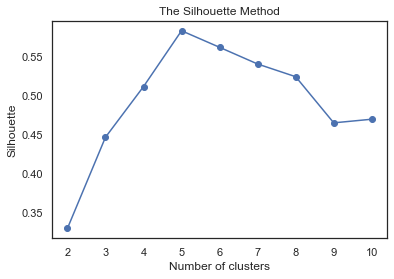

In [83]:
# Find the range of clusters to be used using silhouette method.
sil = []
kmax = 10

for k in range(2, kmax+1):
    kmeans_s = KMeans(n_clusters = k).fit(x_scaled)
    labels = kmeans_s.labels_
    sil.append(silhouette_score(x_scaled,
                                labels,
                                metric = 'euclidean'))

# Plot the silhouette method.
plt.plot(range(2, kmax+1),
         sil,
         marker = 'o')

# Format Figure Attributes.
plt.title("The Silhouette Method")
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette")

# View plot.
plt.show()

## `k = 5`

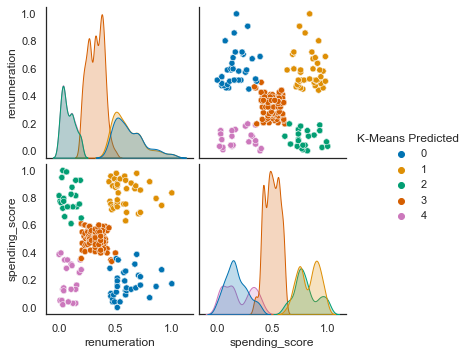

In [84]:
# Use five clusters.
kmeans = KMeans(n_clusters = 5, 
                max_iter = 15000,
                init = 'k-means++',
                random_state = 42).fit(x_scaled)

clusters = kmeans.labels_

x_scaled['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x_scaled,
             hue = 'K-Means Predicted',
             palette = 'colorblind',
             diag_kind =  'kde')

In [85]:
# Check the number of observations per predicted class.
x_scaled['K-Means Predicted'].value_counts()

3    774
1    356
0    330
4    271
2    269
Name: K-Means Predicted, dtype: int64

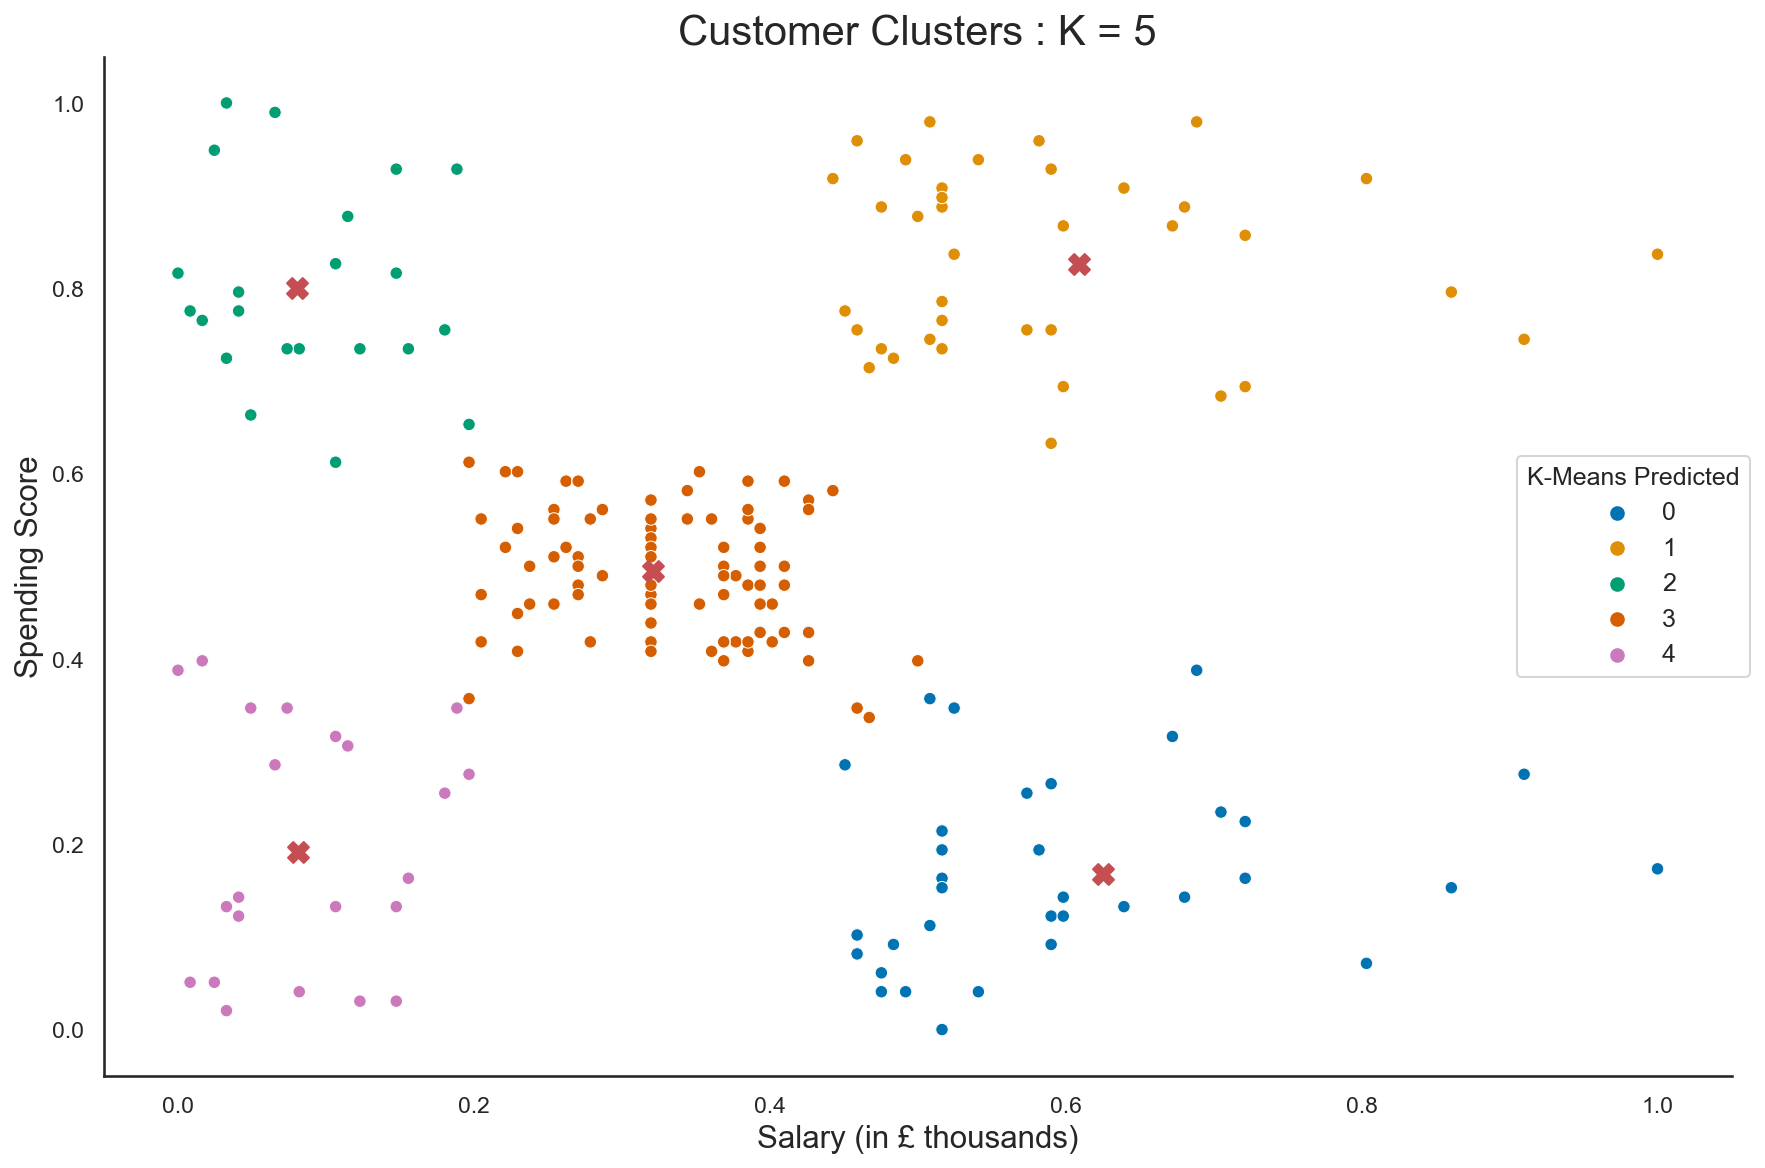

In [86]:
# Define figure.
fig, ax = plt.subplots(figsize = (14, 9),
                       dpi = 150)

# Create a scatterplot.
sns.scatterplot(x = 'renumeration' , 
                y ='spending_score',
                data = x_scaled,
                hue = 'K-Means Predicted',
                palette = 'colorblind')

# Format figure attributes.
plt.title('Customer Clusters : K = 5',
          fontsize = 20)
plt.xlabel('Salary (in £ thousands)', fontsize = 15)
plt.ylabel('Spending Score', fontsize = 15)
sns.despine()
sns.set(style = "white")
plt.legend(title = 'K-Means Predicted', fontsize = 12,
           bbox_to_anchor = (.95, .5), loc = 'center right', borderaxespad = -4)

# Add cluster centers.
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 
            marker = "X", c = "r", s = 100, label = "centroids")

# View plot.
plt.show()

# Save the plot.
fig.savefig('Turtle Games Customer Clusters (k = 5) (Scaled).jpg')

# <div align="center"> Sentiment Analysis

In [87]:
# Create a new DataFrame with relevant columns.
rrs = reviews_c.copy()

# View the new DataFrame.
rrs.head()

gender  age  renumeration  spending_score  loyalty_points education  \
0    Male   18         12.30              39             210  graduate   
1    Male   23         12.30              81             524  graduate   
2  Female   22         13.12               6              40  graduate   
3  Female   25         13.12              77             562  graduate   
4  Female   33         13.94              40             366  graduate   

   product                                             review  \
0      453  When it comes to a DM's screen, the space on t...   
1      466  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2      254  Nice art, nice printing.  Why two panels are f...   
3      263  Amazing buy! Bought it as a gift for our new d...   
4      291  As my review of GF9's previous screens these w...   

                                             summary  
0  The fact that 50% of this space is wasted on a...  
1  Another worthless Dungeon Master's screen from...  
2                    pretty, but also pretty useless  
3                                         Five Stars  
4                                         Money trap

In [88]:
# Determine missing values.
rrs[['review', 'summary']].isna().sum()

review     0
summary    0
dtype: int64

## <div align="center"> Pe-Process Data

### Change words to lower case

#### 'review'

In [89]:
# Transform data to lowercase.
rrs['review'] = rrs['review'].apply(lambda x: " ".join(x.lower() for x in x.split()))

# Preview the result.
rrs['review'].head()

0    when it comes to a dm's screen, the space on t...
1    an open letter to galeforce9*: your unpainted ...
2    nice art, nice printing. why two panels are fi...
3    amazing buy! bought it as a gift for our new d...
4    as my review of gf9's previous screens these w...
Name: review, dtype: object

#### 'summary'

In [90]:
# Transform data to lowercase.
rrs['summary'] = rrs['summary'].apply(lambda x: " ".join(x.lower() for x in x.split()))

# Preview the result.
rrs['summary'].head()

0    the fact that 50% of this space is wasted on a...
1    another worthless dungeon master's screen from...
2                      pretty, but also pretty useless
3                                           five stars
4                                           money trap
Name: summary, dtype: object

### Remove punctuation

#### 'review'

In [91]:
# Remove punctuation.
rrs['review'] = rrs['review'].str.replace('[^\w\s]','')

# Preview the result.
rrs['review'].head()

0    when it comes to a dms screen the space on the...
1    an open letter to galeforce9 your unpainted mi...
2    nice art nice printing why two panels are fill...
3    amazing buy bought it as a gift for our new dm...
4    as my review of gf9s previous screens these we...
Name: review, dtype: object

#### 'summary'

In [92]:
# Remove punctuation.
rrs['summary'] = rrs['summary'].str.replace('[^\w\s]','')

# Preview the result.
rrs['summary'].head()

0    the fact that 50 of this space is wasted on ar...
1    another worthless dungeon masters screen from ...
2                       pretty but also pretty useless
3                                           five stars
4                                           money trap
Name: summary, dtype: object

### Drop duplicates

#### 'review'

In [93]:
# Check the number of duplicate values in the 'review' column.
rrs['review'].duplicated().sum()

50

In [94]:
# Drop duplicates.
rrs = rrs.drop_duplicates(subset = ['review'])

# Preview data.
rrs.reset_index(inplace = True)
rrs.head()

index  gender  age  renumeration  spending_score  loyalty_points education  \
0      0    Male   18         12.30              39             210  graduate   
1      1    Male   23         12.30              81             524  graduate   
2      2  Female   22         13.12               6              40  graduate   
3      3  Female   25         13.12              77             562  graduate   
4      4  Female   33         13.94              40             366  graduate   

   product                                             review  \
0      453  when it comes to a dms screen the space on the...   
1      466  an open letter to galeforce9 your unpainted mi...   
2      254  nice art nice printing why two panels are fill...   
3      263  amazing buy bought it as a gift for our new dm...   
4      291  as my review of gf9s previous screens these we...   

                                             summary  
0  the fact that 50 of this space is wasted on ar...  
1  another worthless dungeon masters screen from ...  
2                     pretty but also pretty useless  
3                                         five stars  
4                                         money trap

In [95]:
# Check the number of duplicate values in the 'review' column.
rrs['review'].duplicated().sum()

0

#### 'summary'

In [96]:
# Check the number of duplicate values in the 'summary' column.
rrs['summary'].duplicated().sum()

601

In [97]:
# Drop duplicates.
rrs = rrs.drop_duplicates(subset = ['summary'])

# Preview data.
rrs.reset_index(inplace = True)
rrs.head()

level_0  index  gender  age  renumeration  spending_score  loyalty_points  \
0        0      0    Male   18         12.30              39             210   
1        1      1    Male   23         12.30              81             524   
2        2      2  Female   22         13.12               6              40   
3        3      3  Female   25         13.12              77             562   
4        4      4  Female   33         13.94              40             366   

  education  product                                             review  \
0  graduate      453  when it comes to a dms screen the space on the...   
1  graduate      466  an open letter to galeforce9 your unpainted mi...   
2  graduate      254  nice art nice printing why two panels are fill...   
3  graduate      263  amazing buy bought it as a gift for our new dm...   
4  graduate      291  as my review of gf9s previous screens these we...   

                                             summary  
0  the fact that 50 of this space is wasted on ar...  
1  another worthless dungeon masters screen from ...  
2                     pretty but also pretty useless  
3                                         five stars  
4                                         money trap

In [98]:
# Check the number of duplicate values in the 'summary' column.
rrs['summary'].duplicated().sum()

0

## Most Frequently Used Words

In [99]:
# Import nltk and download nltk's resources to assist with tokenisation.
import nltk

nltk.download('punkt')
from nltk.tokenize import word_tokenize

# Import the FreqDist class.
from nltk.probability import FreqDist

# Import wordcloud and seaborn for visualisation.
from wordcloud import WordCloud
import seaborn as sns

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/mylestrimble/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### 'review'

#### Tokenise

In [100]:
# Tokenise the 'review' column.
rrs['review_tokens'] = rrs['review'].apply(word_tokenize)

# Preview data.
rrs['review_tokens'].head()

0    [when, it, comes, to, a, dms, screen, the, spa...
1    [an, open, letter, to, galeforce9, your, unpai...
2    [nice, art, nice, printing, why, two, panels, ...
3    [amazing, buy, bought, it, as, a, gift, for, o...
4    [as, my, review, of, gf9s, previous, screens, ...
Name: review_tokens, dtype: object

In [101]:
# Define an empty list of tokens.
all_review_tokens = []

for i in range(rrs.shape[0]):
    all_review_tokens = all_review_tokens + rrs['review_tokens'][i]

In [102]:
# Filter out tokens that are neither alphabets nor numbers
# (to eliminate punctuation marks, etc.).
review_tokens = [word for word in all_review_tokens if word.isalnum()]

#### Frequency Distribution

In [103]:
# Calculate the frequency distribution.
fdist_review = FreqDist(all_review_tokens)

# Preview data.
fdist_review

FreqDist({'the': 5019, 'and': 2934, 'to': 2843, 'a': 2829, 'of': 2261, 'i': 1887, 'it': 1830, 'is': 1593, 'this': 1549, 'for': 1360, ...})

#### Remove Stopwords

In [104]:
# Download the stopword list.
nltk.download ('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mylestrimble/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [105]:
# Create a set of English stopwords.
english_stopwords = set(stopwords.words('english'))

# Create a filtered list of tokens without stopwords.
review_tokens_2 = [x for x in review_tokens if x.lower() not in english_stopwords]

# Define an empty string variable.
review_tokens_string = ''

# Add each filtered token word to the string.
for value in review_tokens:
    review_tokens_string = review_tokens_string + value + ' '

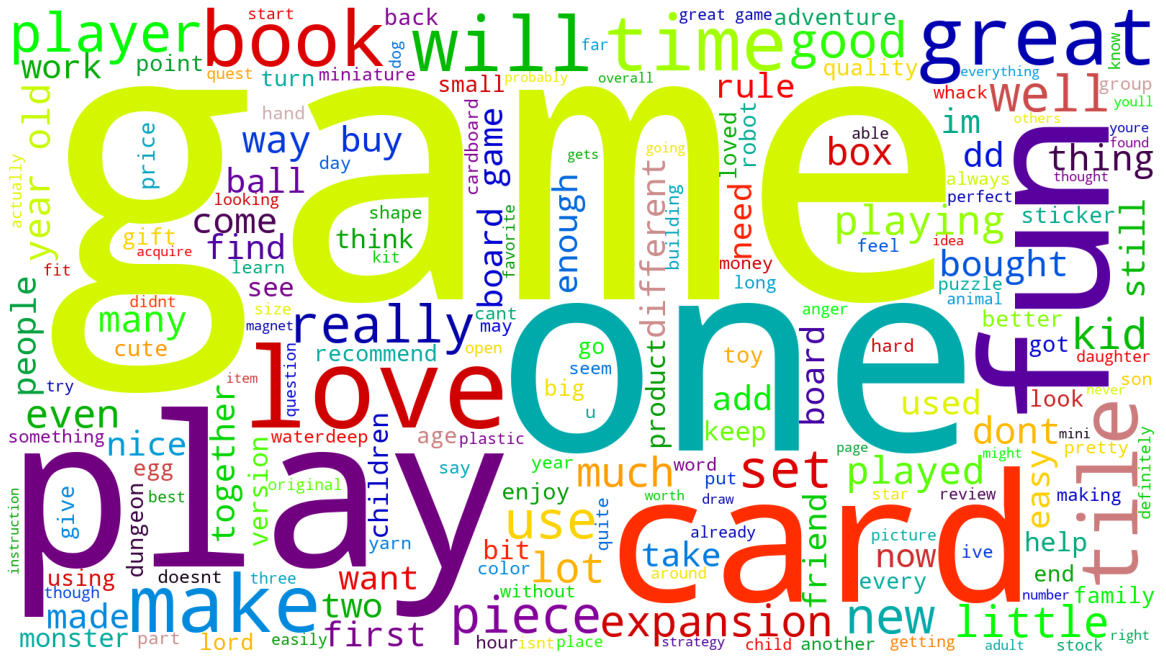

In [106]:
# Create a WordCloud.
wordcloud_review = WordCloud(width = 1600, height = 900, 
                             background_color = 'white', 
                             colormap = 'nipy_spectral', 
                             min_font_size = 10).generate(review_tokens_string) 

# Plot the WordCloud image.                        
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(wordcloud_review) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

- Unsurprisingly, we can see the most frequently used words (eg. **game, play**) are those that would be expexted in this context.
- It is apparent that some of the most frequently used words (eg. **fun, love, good**) are positive.


- However, as this word cloud is for exploratory purposes, it would not be fit to analyse the placement of these words further.
    - It will be useful to refer back to as analysis continues.

### 'summary'

#### Tokenise

In [107]:
# Tokenise the 'review' column.
rrs['summary_tokens'] = rrs['summary'].apply(word_tokenize)

# Preview data.
rrs['summary_tokens'].head()

0    [the, fact, that, 50, of, this, space, is, was...
1    [another, worthless, dungeon, masters, screen,...
2                 [pretty, but, also, pretty, useless]
3                                        [five, stars]
4                                        [money, trap]
Name: summary_tokens, dtype: object

In [108]:
# Define an empty list of tokens.
all_summary_tokens = []

for i in range(rrs.shape[0]):
    all_summary_tokens = all_summary_tokens + rrs['summary_tokens'][i]

In [109]:
# Filter out tokens that are neither alphabets nor numbers
# (to eliminate punctuation marks, etc.).
summary_tokens = [word for word in all_summary_tokens if word.isalnum()]

#### Frequency Distribution

In [110]:
# Calculate the frequency distribution.
fdist_summary = FreqDist(all_summary_tokens)

# Preview data.
fdist_summary

FreqDist({'game': 268, 'the': 257, 'a': 238, 'great': 236, 'for': 229, 'to': 192, 'fun': 175, 'and': 168, 'it': 139, 'of': 131, ...})

#### Remove Stopwords

In [111]:
# Create a filtered list of tokens without stopwords.
summary_tokens_2 = [x for x in summary_tokens if x.lower() not in english_stopwords]

# Define an empty string variable.
summary_tokens_string = ''

# Add each filtered token word to the string.
for value in summary_tokens:
    summary_tokens_string = summary_tokens_string + value + ' '

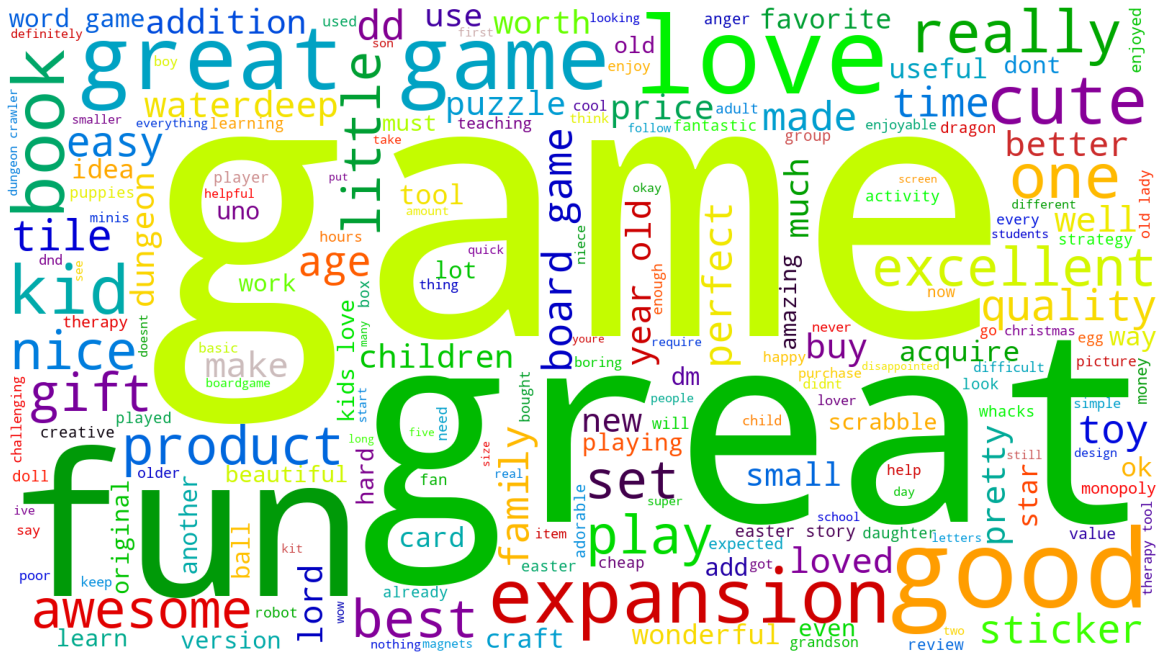

In [112]:
# Create a WordCloud.
wordcloud_summary = WordCloud(width = 1600, height = 900, 
                              background_color = 'white', 
                              colormap = 'nipy_spectral', 
                              min_font_size = 10).generate(summary_tokens_string) 

# Plot the WordCloud image.                        
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(wordcloud_summary) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

- Again, words like **awesome, love, great** are words with positive sentimet attached, and as this word cloud is constructed from the `review summary` text, it is perhaps more significant for initial analysis as it is more distilled.
    - It would certainly be useful to drill further into the use of the word **expansion** and see how people are talking about it as it is clearly significant and may be beneficial for product development in this area.

## Sentiment Polarity

### 'review'

In [113]:
# Import the Counter class.
from collections import Counter

# Import TextBlob.
from textblob import TextBlob

In [114]:
# Generate a DataFrame from Counter.
counts_review = pd.DataFrame(Counter(review_tokens_2).most_common(15),
                             columns = ['Word', 'Frequency']).set_index('Word')

# Preview data.
counts_review

Frequency
Word             
game         1359
one           475
play          442
fun           407
great         391
like          373
get           293
cards         281
tiles         280
really        278
book          259
would         252
well          246
time          244
new           237

#### Visualise

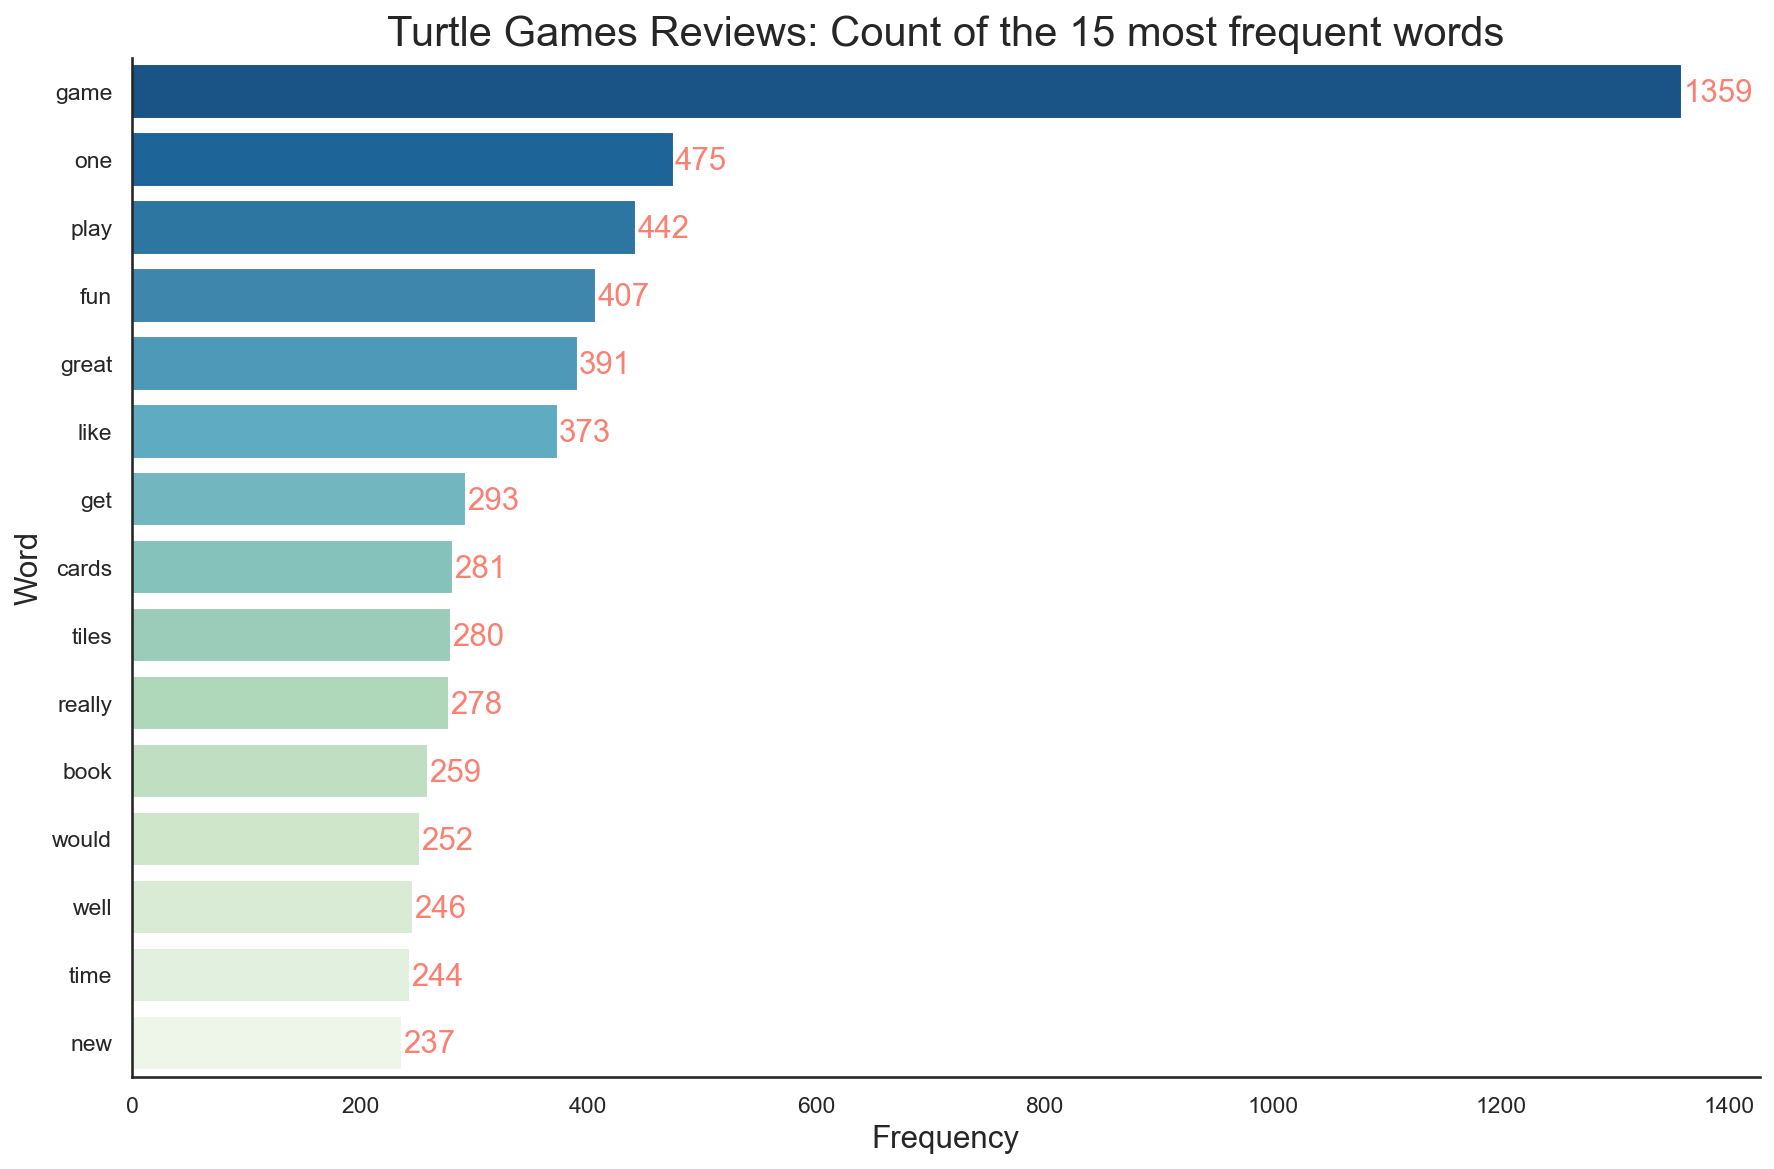

In [115]:
# Define figure.
fig, ax = plt.subplots(figsize = (14, 9),
                       dpi = 150)

# Create bar plot.
sns.barplot(x = 'Frequency', y = counts_review.index,
            palette = 'GnBu_r',
            data = counts_review)

# Format figure attributes.
plt.title('Turtle Games Reviews: Count of the 15 most frequent words',
          fontsize = 20)
plt.xlabel('Frequency', fontsize = 15)
plt.ylabel('Word', fontsize = 15)
sns.despine()


# Draw bar labels.
for i in ax.patches:
    ax.text(i.get_width()+1, i.get_y()+.55, int(i.get_width()),
            fontsize = 15, color = 'salmon')

# View plot.
plt.show()

In [116]:
# Define a function to extract a polarity score for the comment.
def generate_polarity(comment):
    return TextBlob(comment).sentiment[0]

# Populate a new column with polarity scores for each comment.
rrs['polarity_review'] = rrs['review'].apply(generate_polarity)

# Preview the result.
rrs['polarity_review'].head()

0   -0.036111
1    0.035952
2    0.116640
3    0.578788
4   -0.316667
Name: polarity_review, dtype: float64

In [117]:
# Define a function to extract a subjectivity score for the comment.
def generate_subjectivity(comment):
    return TextBlob(comment).sentiment[1]

# Populate a new column with subjectivity scores for each comment.
rrs['subjectivity_review'] = rrs['review'].apply(generate_subjectivity)

# Preview the result.
rrs['subjectivity_review'].head()

0    0.486111
1    0.442976
2    0.430435
3    0.784848
4    0.316667
Name: subjectivity_review, dtype: float64

#### Visualise

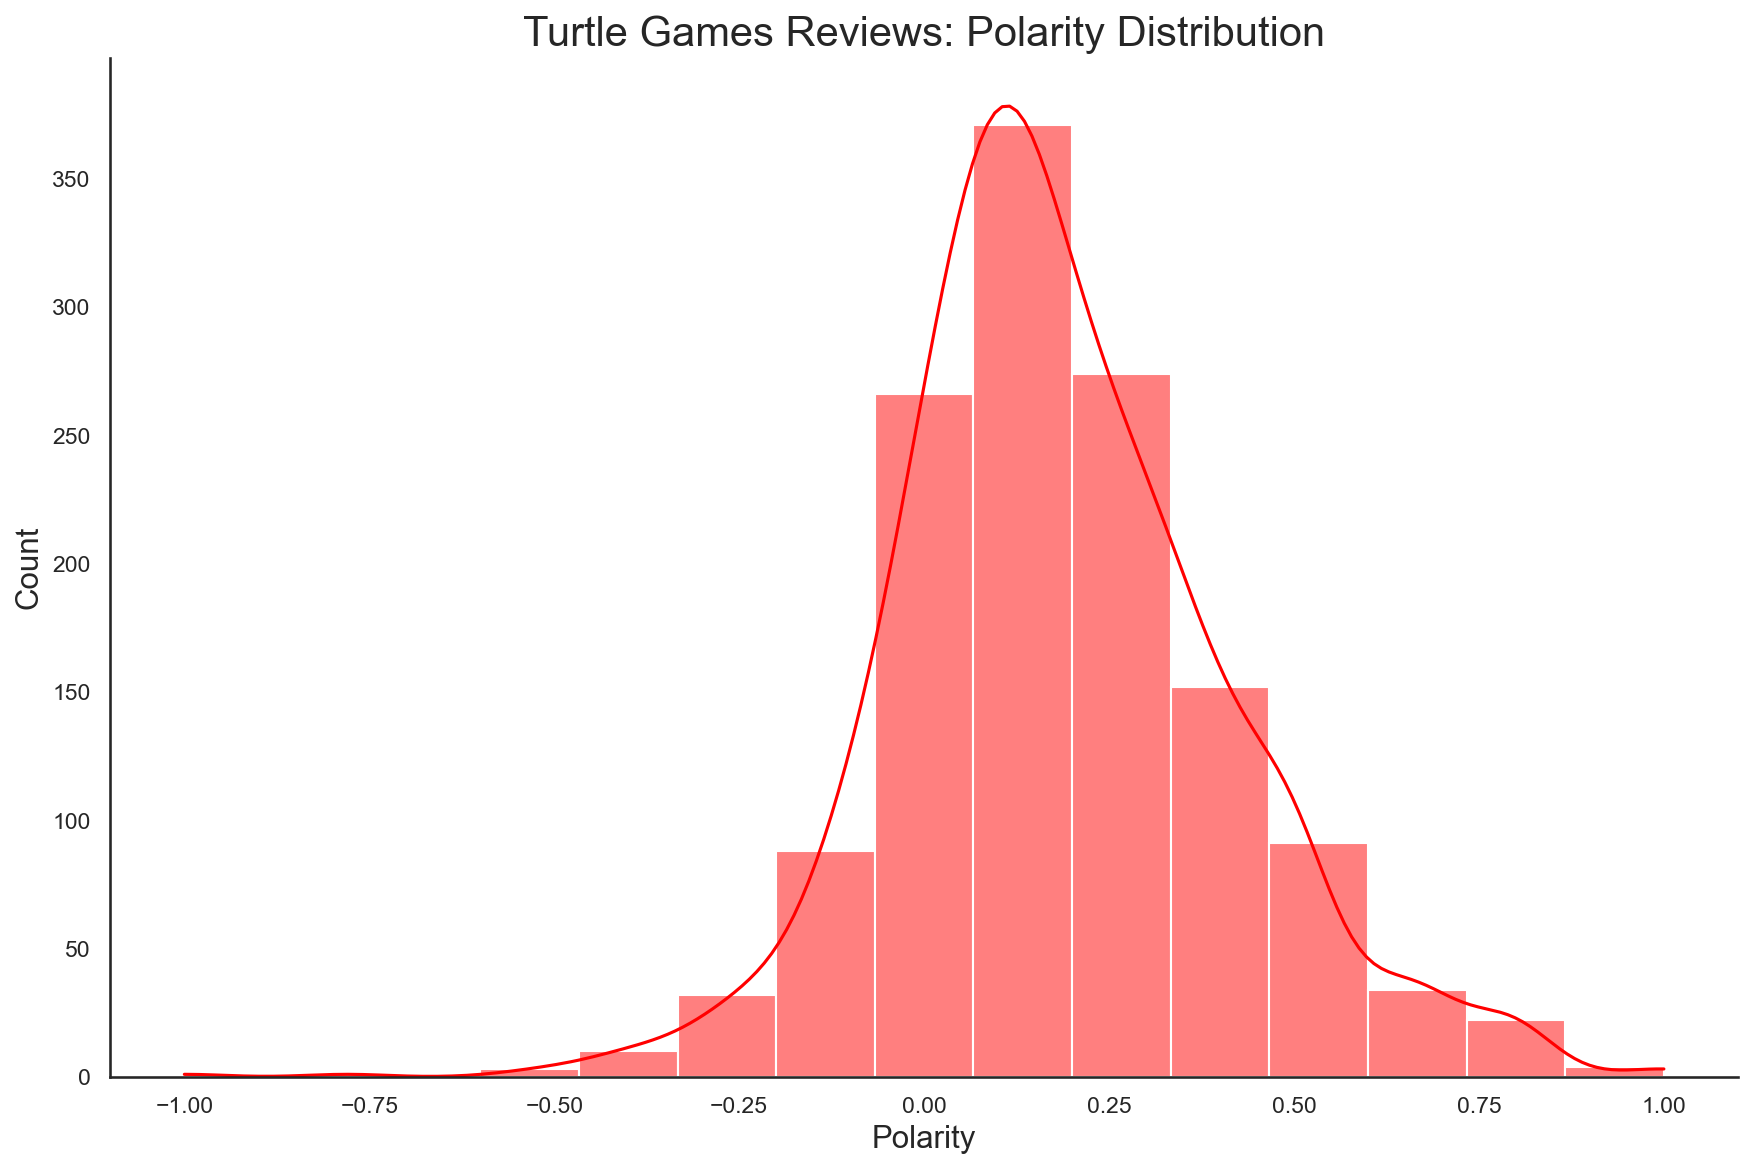

In [118]:
# Define figure.
fig, ax = plt.subplots(figsize = (14, 9),
                       dpi = 150)

# Create histogram.
sns.histplot(x = 'polarity_review',
             bins = 15, kde = True,
             color = 'red',
             data = rrs)

# Format figure attributes.
plt.title('Turtle Games Reviews: Polarity Distribution',
          fontsize = 20)
plt.xlabel('Polarity', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
sns.despine()
sns.set(style = "white")

# View plot.
plt.show()

# Save the plot.
fig.savefig('Turtle Games Reviews - Polarity Distribution.jpg')

- The plot shows the data to be normally distributed with a slight skew to the left, showing most comments to be generally more positive than negative.
    - This affirms the initial reading of the word clouds.

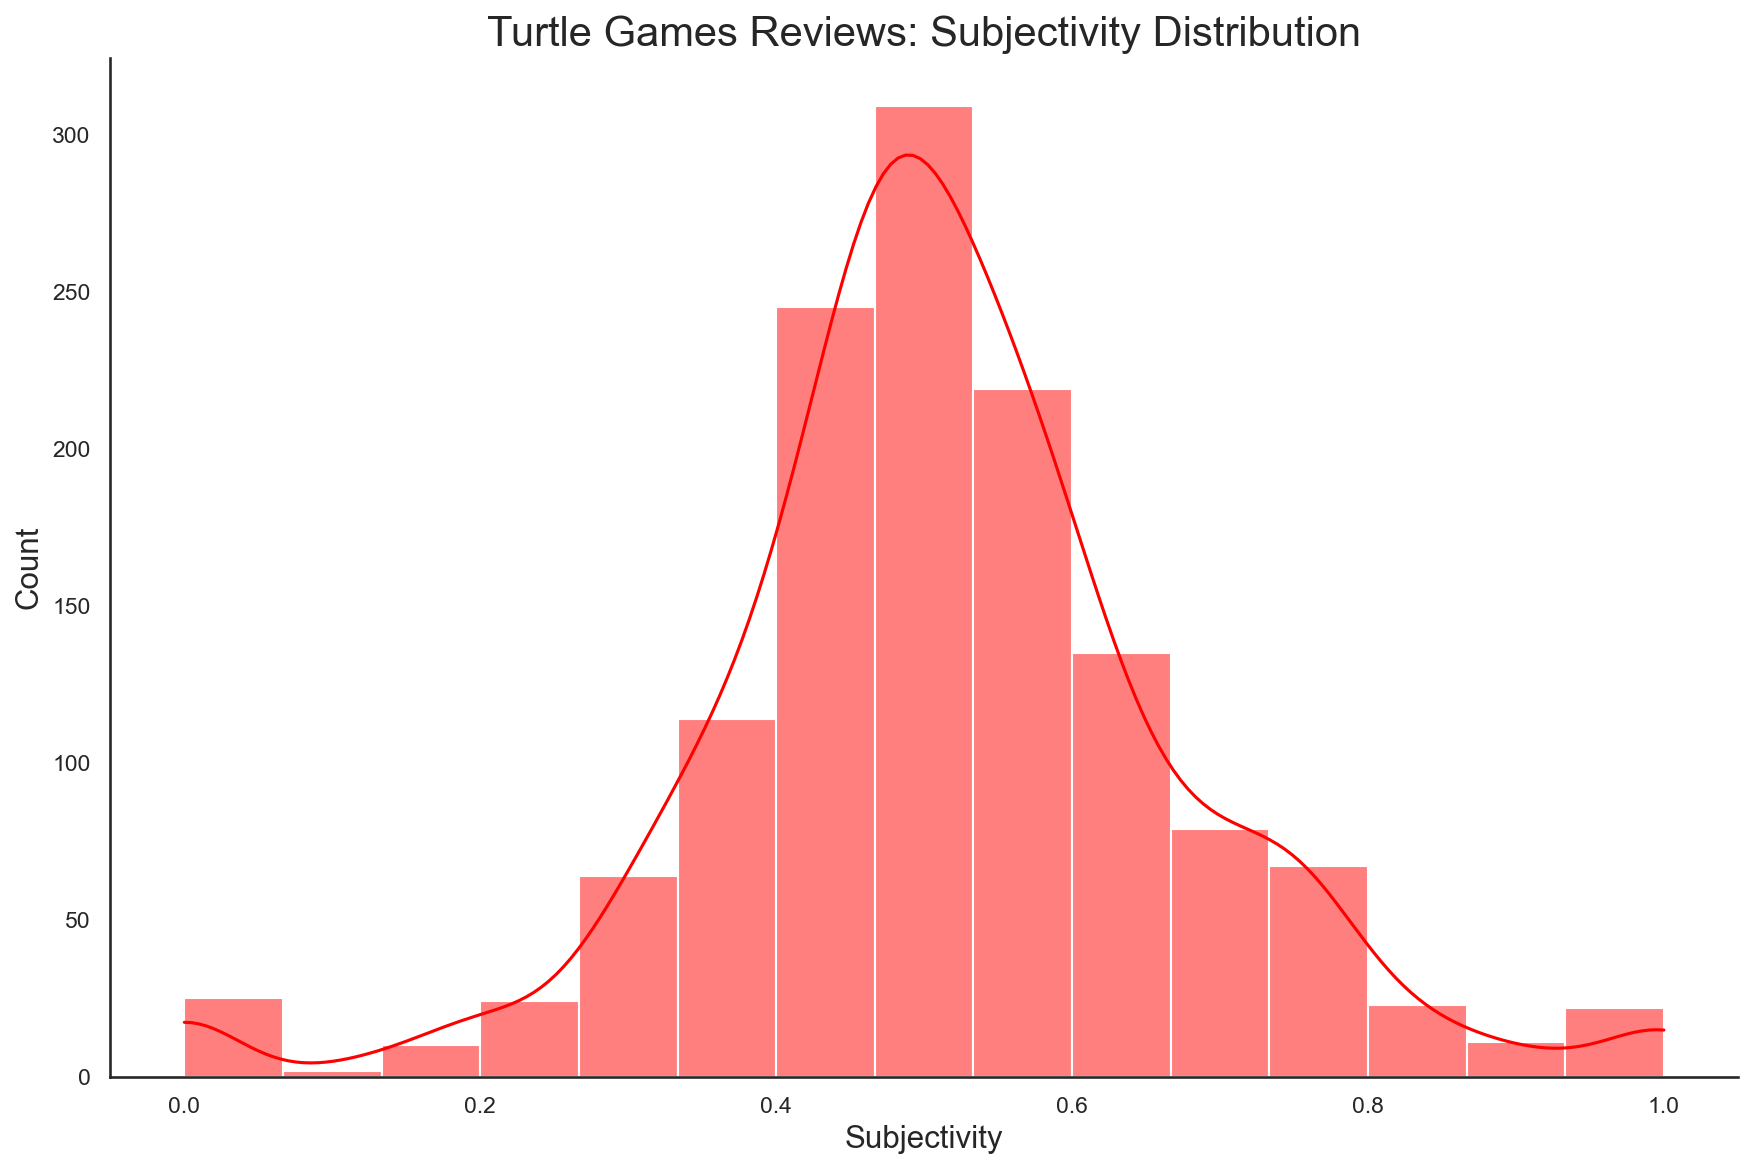

In [119]:
# Define figure.
fig, ax = plt.subplots(figsize = (14, 9),
                       dpi = 150)

# Create histogram.
sns.histplot(x = 'subjectivity_review',
             bins = 15, kde = True,
             color = 'red',
             data = rrs)

# Format figure attributes.
plt.title('Turtle Games Reviews: Subjectivity Distribution',
          fontsize = 20)
plt.xlabel('Subjectivity', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
sns.despine()
sns.set(style = "white")

# View plot.
plt.show()

This plot shows the subjectivity of the reviews to be normally distributed around the mean of **0.5**, indicating that most reviews are neither particularly subjective or particularly objective, and range relatively evenly throughout being both subjective and objective.

### 'summary'

In [120]:
# Generate a DataFrame from Counter.
counts_summary = pd.DataFrame(Counter(summary_tokens_2).most_common(15),
                             columns = ['Word', 'Frequency']).set_index('Word')

# Preview data.
counts_summary

Frequency
Word                
game             268
great            236
fun              175
good              84
love              70
like              54
kids              48
book              42
expansion         42
cute              40
old               34
really            30
set               29
nice              28
one               28

#### Visualise

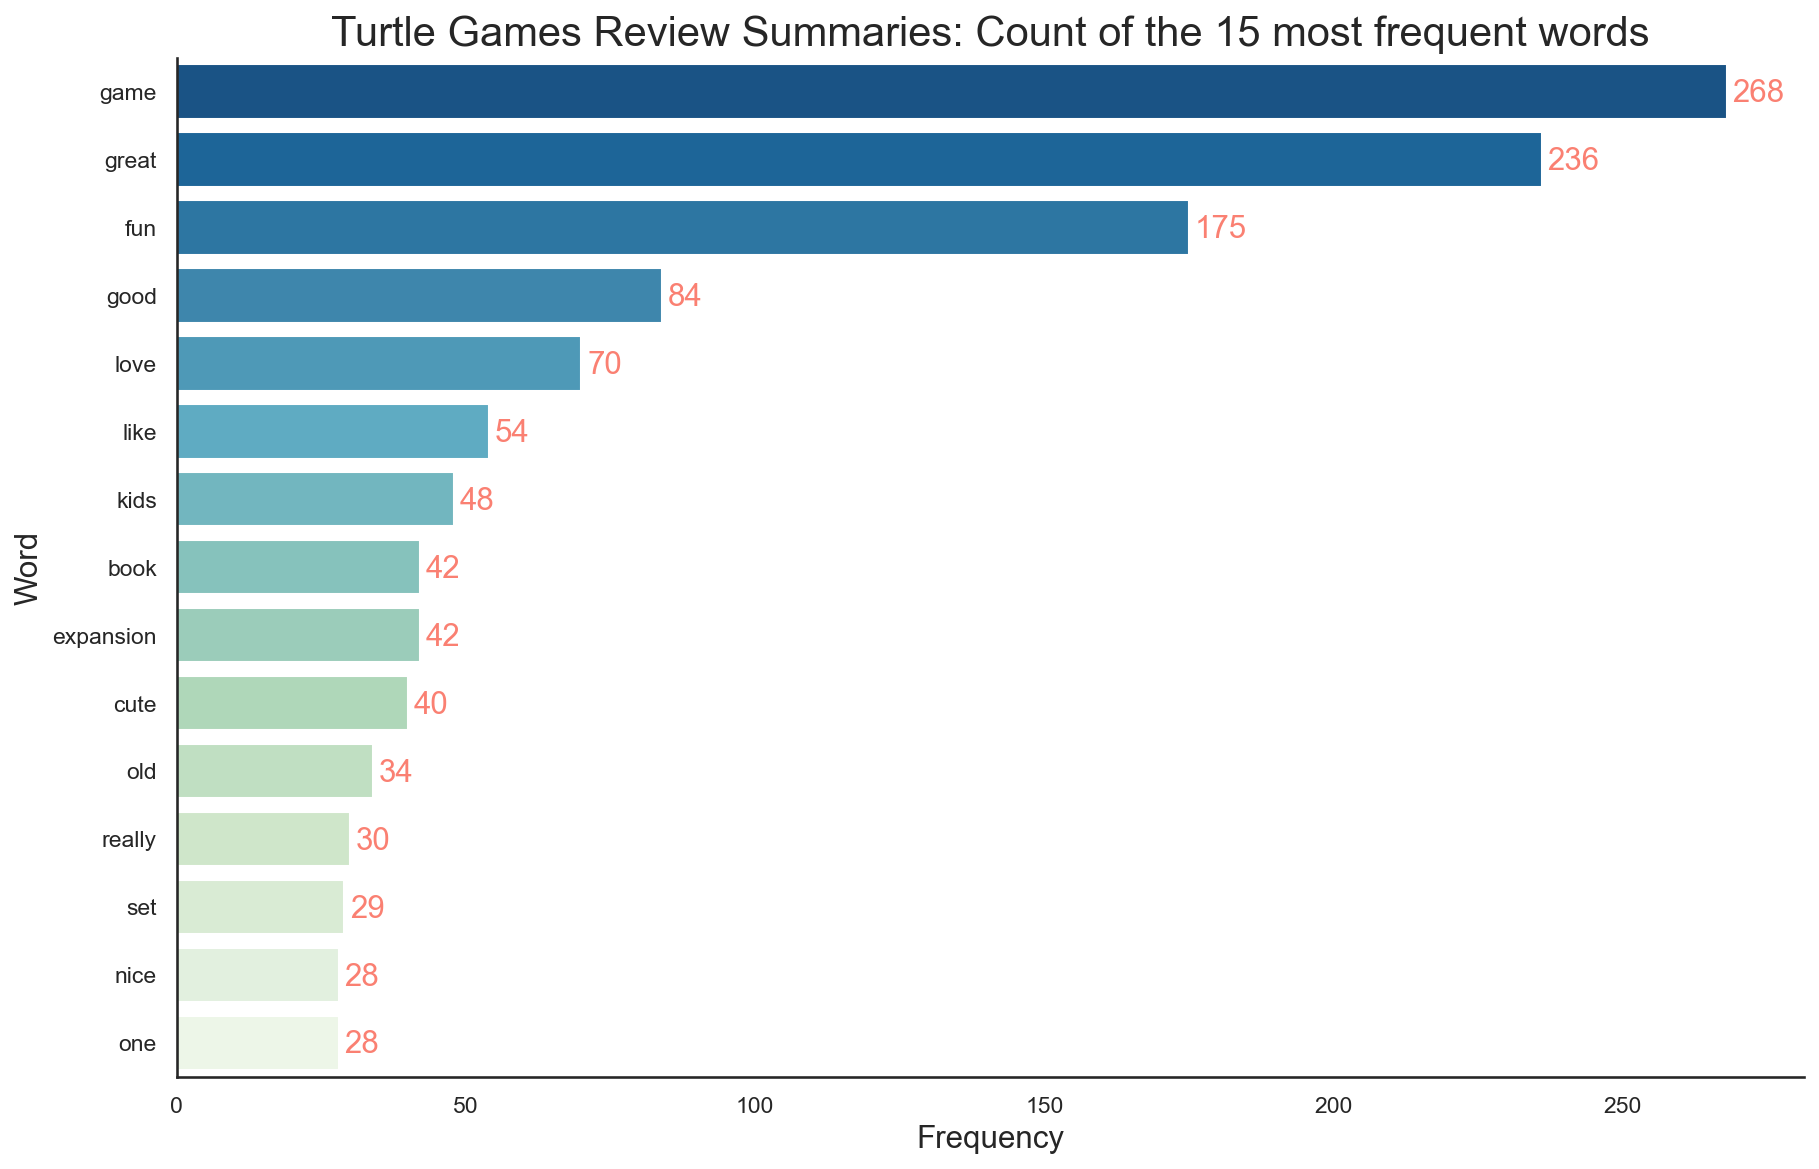

In [121]:
# Define figure.
fig, ax = plt.subplots(figsize = (14, 9),
                       dpi = 150)

# Create bar plot.
sns.barplot(x = 'Frequency', y = counts_summary.index,
            palette = 'GnBu_r',
            data = counts_summary)

# Format figure attributes.
plt.title('Turtle Games Review Summaries: Count of the 15 most frequent words',
          fontsize = 20)
plt.xlabel('Frequency', fontsize = 15)
plt.ylabel('Word', fontsize = 15)
sns.despine()


# Draw bar labels.
for i in ax.patches:
    ax.text(i.get_width()+1, i.get_y()+.55, int(i.get_width()),
            fontsize = 15, color = 'salmon')

# View plot.
plt.show()

# Save the plot.
fig.savefig('Review Summaries - Top 15 Words.jpg')

- “**Book**” and “**Expansion**” are mentioned often in a favourable manner.
    - It may be beneficial to focus on these types of products as the project continues.

In [122]:
# Populate a new column with polarity scores for each comment.
rrs['polarity_summary'] = rrs['summary'].apply(generate_polarity)

# Preview the result.
rrs['polarity_summary'].head()

0    0.15
1   -0.80
2    0.00
3    0.00
4    0.00
Name: polarity_summary, dtype: float64

In [123]:
# Populate a new column with subjectivity scores for each comment.
rrs['subjectivity_summary'] = rrs['summary'].apply(generate_subjectivity)

# Preview the result.
rrs['subjectivity_summary'].head()

0    0.500000
1    0.900000
2    0.733333
3    0.000000
4    0.000000
Name: subjectivity_summary, dtype: float64

#### Visualise

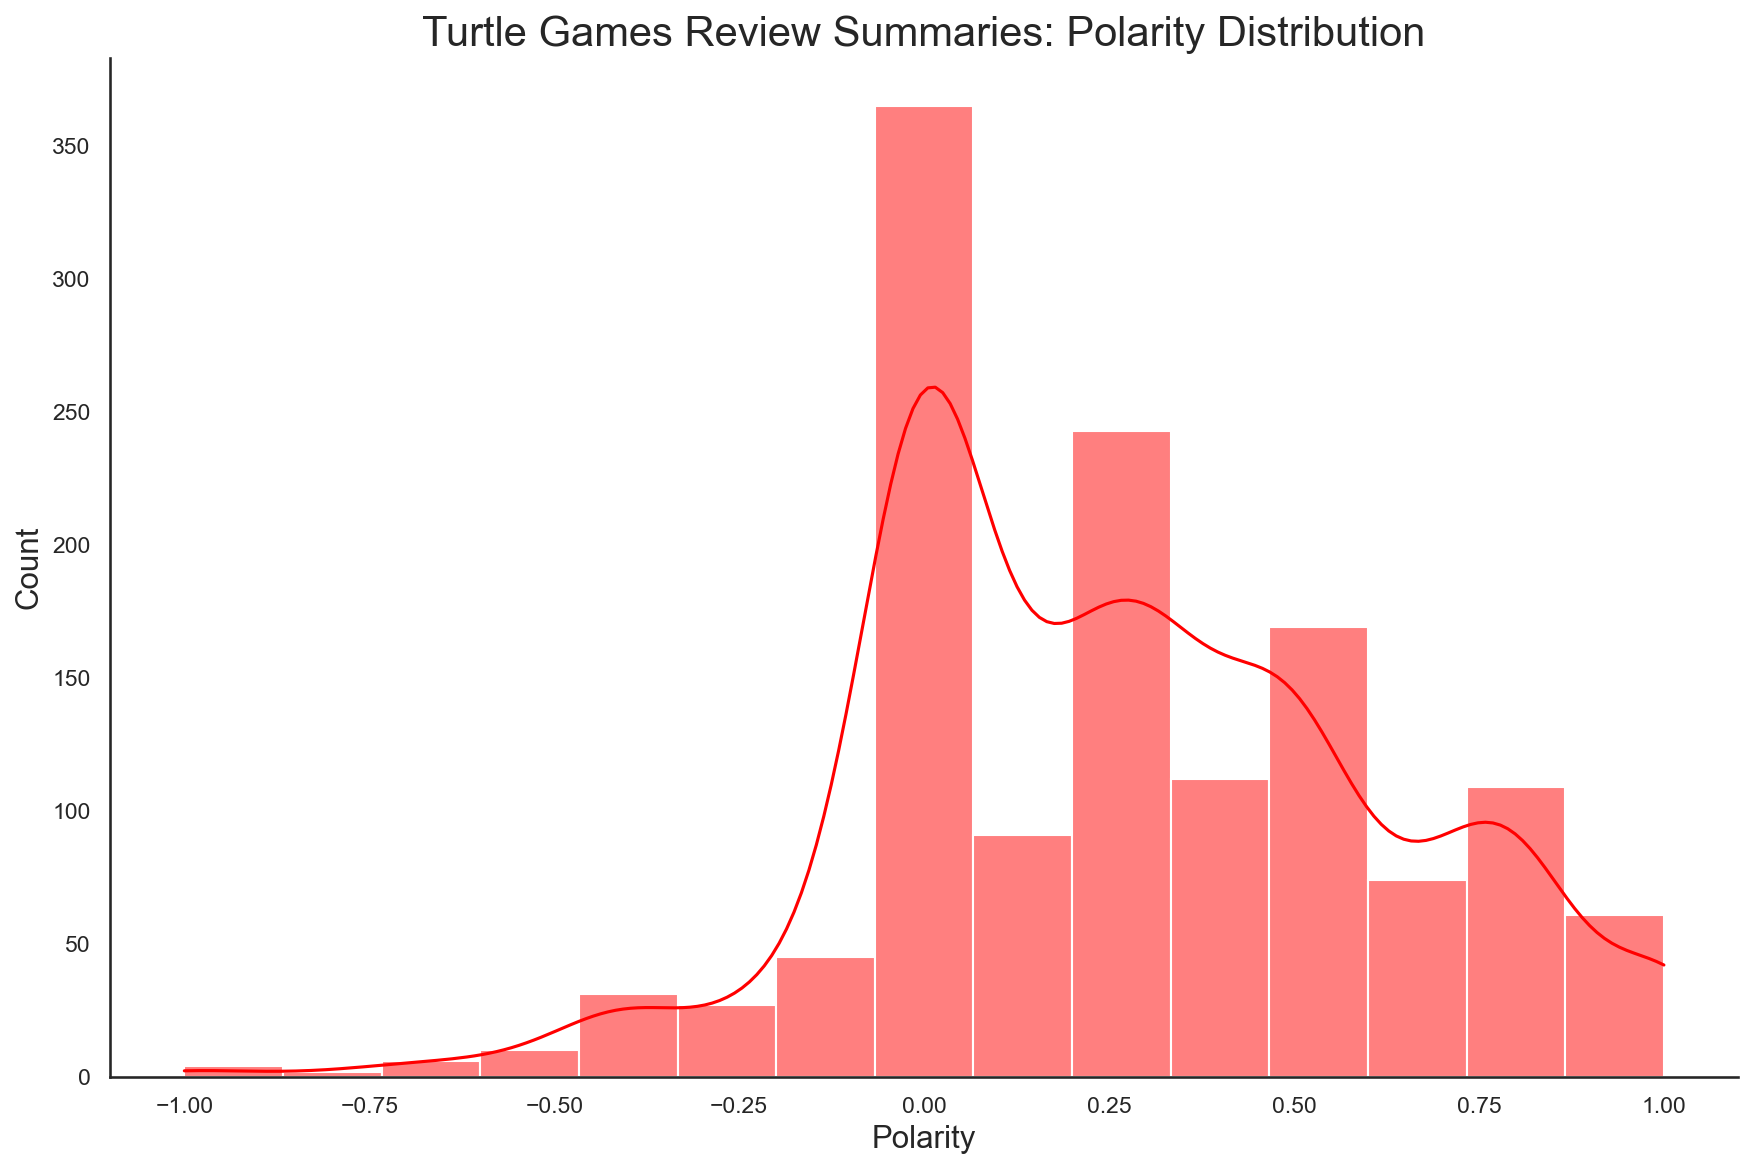

In [124]:
# Define figure.
fig, ax = plt.subplots(figsize = (14, 9),
                       dpi = 150)

# Create histogram.
sns.histplot(x = 'polarity_summary',
             bins = 15, kde = True,
             color = 'red',
             data = rrs)

# Format figure attributes.
plt.title('Turtle Games Review Summaries: Polarity Distribution',
          fontsize = 20)
plt.xlabel('Polarity', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
sns.despine()
sns.set(style = "white")

# View plot.
plt.show()

- As the `summary` data is a more distilled version of the `review` data, we can see the positive polarity at a more extreme level with this plot.
    - The data is not normally distributed and is leaning heavily towards more positive polarity, as shown initially by comparing the word clouds.

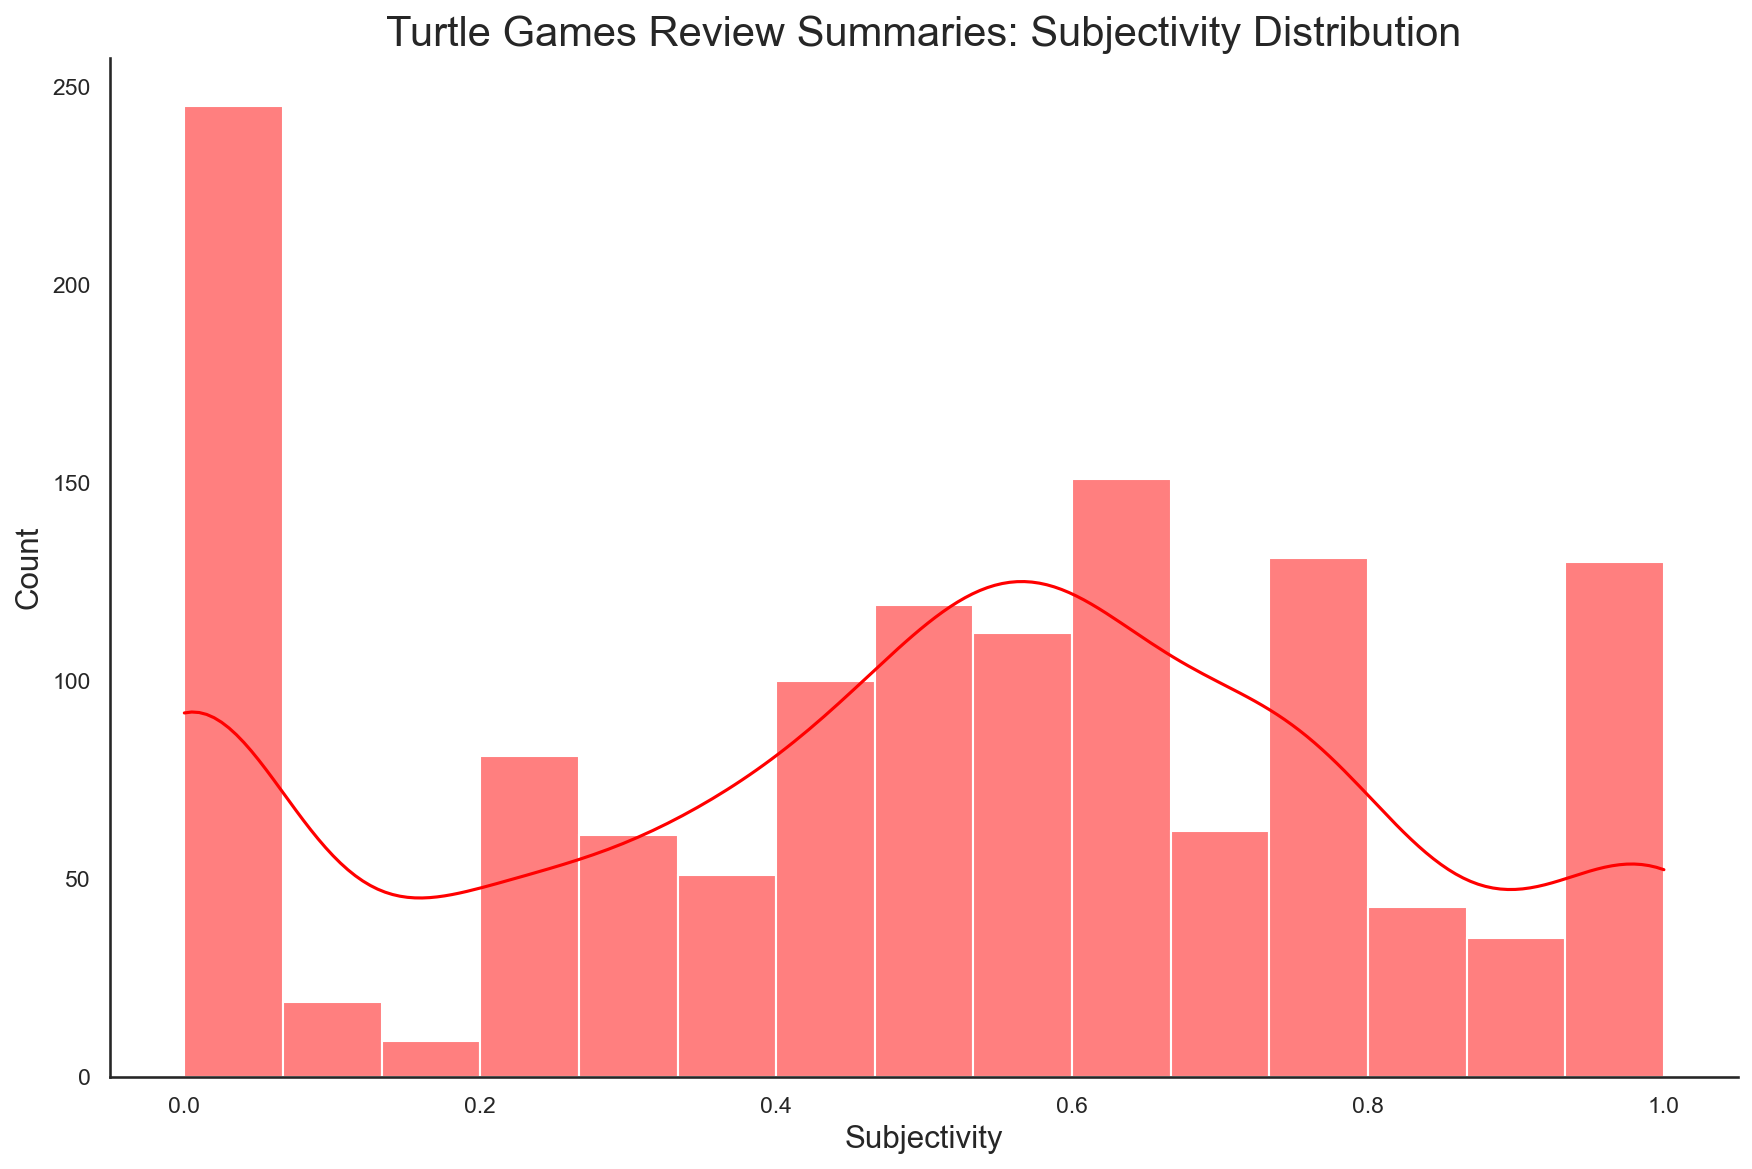

In [125]:
# Define figure.
fig, ax = plt.subplots(figsize = (14, 9),
                       dpi = 150)

# Create histogram.
sns.histplot(x = 'subjectivity_summary',
             bins = 15, kde = True,
             color = 'red',
             data = rrs)

# Format figure attributes.
plt.title('Turtle Games Review Summaries: Subjectivity Distribution',
          fontsize = 20)
plt.xlabel('Subjectivity', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
sns.despine()
sns.set(style = "white")

# View plot.
plt.show()

### Extract Contextualised Comments

### Positive

#### 'review'

In [126]:
# Create a DataFrame.
positive_sentiment_review = rrs.nlargest(20, 'polarity_review')

# Eliminate unnecessary columns.
positive_sentiment_review = positive_sentiment_review[['age', 'renumeration',
                                                       'product', 'review',
                                                       'polarity_review',
                                                       'subjectivity_review']]

# Adjust the column width.
positive_sentiment_review.style.set_properties(subset = ['review'], **{'width': '500px'})

- The top 20 positive reviews are at the upper end of the polarity scale, with the lowest level of polarity at **0.79**.
- Unsurprisingly, most positive reviewes have a high degree of subjectivity.


- I chose to include the `product` code so as to identify the specific product that each review is referering to.
- I also chose to include `age` and `renumeration` data as it may be useful to identify particular demographics of customers who leave reviews of this nature and for these products.
    - As the project continues, other variables could be included in this matrix to investigate and gain a deeper understanding of these customers.

#### 'summary'

In [127]:
# Create a DataFrame.
positive_sentiment_summary = rrs.nlargest(20, 'polarity_summary')

# Eliminate unnecessary columns.
positive_sentiment_summary = positive_sentiment_summary[['age', 'renumeration',
                                                         'product', 'summary',
                                                         'polarity_summary',
                                                         'subjectivity_summary']]

# Adjust the column width.
positive_sentiment_summary.style.set_properties(subset = ['summary'], **{'width': '300px'})

- Again, unsurprisingly, the most positive review summaries had a strikingly high level of subjectivity. 

In [128]:
# Isolate specific review summary.
print(positive_sentiment_summary.iloc[0])

age                                      37
renumeration                          14.76
product                                 979
summary                 best gm screen ever
polarity_summary                        1.0
subjectivity_summary                    0.3
Name: 5, dtype: object


- However, limitations of the `TextBlob` sentiment analysis capabilities are apparent in the top review summary (as shown above).
    - The subjectivity score is relatively low (**0.3**).
    - Upon reading this review summary, one would generally expect it to hold a much higher degree of subjectivity as it is clearly the opinion of this customer.

## Further Exploration

I would like to see if there are positively reviewed products that are talked about more often so as to identify any potential star products.

In [129]:
# Create a DataFrame containing the 50 highest polarity-scored products.
positive_sentiment_summary_star = rrs.nlargest(50, 'polarity_summary')

# Include relevant columns.
positive_sentiment_summary_star = positive_sentiment_summary_star[['product', 'summary',
                                                                'polarity_summary',
                                                                'subjectivity_summary']]

# Check the number of duplicate values in the 'product' column.
positive_sentiment_summary_star['product'].duplicated().sum()

2

In [130]:
# Define variable for printing 'product' duplicates.
product = positive_sentiment_summary_star['product']

# Print duplicates.
positive_sentiment_summary_star[product.isin(product[product.duplicated()])]\
.sort_values('product', ascending = False)\
.style.set_properties(subset = ['summary'], **{'width': '300px'})

- Again, the limitations of `TextBlob` are apparent in the misclassification of **index 476** review summary: "**not the best quality**", which is clearly a more negative review and does not warrent the polarity score of **1**.


- However, product **10196** is perhaps a star product as has been reviewed extremely positively by two customers.

### Negative

#### 'review'

In [131]:
# Create a DataFrame.
negative_sentiment_review = rrs.nsmallest(20, 'polarity_review')

# Eliminate unnecessary columns.
negative_sentiment_review = negative_sentiment_review[['age', 'renumeration',
                                                       'product', 'review',
                                                       'polarity_review',
                                                       'subjectivity_review']]

# Adjust the column width.
negative_sentiment_review.style.set_properties(subset = ['review'], **{'width': '1000px'})

#### 'summary'

In [132]:
# Create a DataFrame.
negative_sentiment_summary = rrs.nsmallest(20, 'polarity_summary')

# Eliminate unnecessary columns.
negative_sentiment_summary = negative_sentiment_summary[['age', 'product', 'summary',
                                                         'polarity_summary',
                                                         'subjectivity_summary']]

# Adjust the column width.
negative_sentiment_summary.style.set_properties(subset = ['summary'], **{'width': '400px'})

## Further Exploration

I would like to identify products with multiple negative reviews so as to highlight products that Turtle Games may want to review.

In [133]:
# Create a DataFrame.
negative_sentiment_summary_plus = rrs.nsmallest(30, 'polarity_summary')

negative_sentiment_summary_plus = negative_sentiment_summary_plus[['product', 'summary',
                                                                   'polarity_summary',
                                                                   'subjectivity_summary']]

# Check the number of duplicate values in the 'product' column.
negative_sentiment_summary_plus['product'].duplicated().sum()

1

In [134]:
product = negative_sentiment_summary_plus['product']

negative_sentiment_summary_plus[product.isin(product[product.duplicated()])]\
.sort_values('product', ascending = True)\
.style.set_properties(subset = ['summary'], **{'width': '1000px'})

- Perhaps it is worth Turtle Games investigating why these customers gave product **1501** such negative reviews or addressing the customers directly with assistance regarding their issues.

## Further Exploration: Vader Sentiment Analyser

As there were some limitations with the `TextBlob` sentiment analysis model, I would like to impliment the use of another, the `VADER` sentiment analyser.

### 'review'

In [135]:
# Import the vader classs.
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Create a variable to store the sia.
sia = SentimentIntensityAnalyzer()

In [136]:
# Create a subset DataFrame.
r_v = rrs[['review']]

# Create a new column to store polarity scores.
r_v['scores'] = r_v['review'].apply(lambda body: sia.polarity_scores(str(body)))

# Create new columns to populate with each polarity score.
r_v['pos'] = r_v['scores'].apply(lambda pos_dict:pos_dict['pos'])
r_v['neg'] = r_v['scores'].apply(lambda neg_dict:neg_dict['neg'])
r_v['compound'] = r_v['scores'].apply(lambda score_dict:score_dict['compound'])

# Create final DataFrame.
rv = r_v[['review', 'pos', 'neg', 'compound']]

# View DataFrame.
rv.style.set_properties(subset = ['review'], **{'width': '1000px'})

In [137]:
# Create a new column which indicates whether the review is positive or negative.
rv['type'] = ''
rv.loc[rv.compound > 0,'type'] = 'Positive'
rv.loc[rv.compound == 0,'type'] = 'Neutral'
rv.loc[rv.compound < 0,'type'] = 'Negative'

# Viewe the updated DataFrame.
rv.head()

review    pos    neg  compound  \
0  when it comes to a dms screen the space on the...  0.059  0.108   -0.6333   
1  an open letter to galeforce9 your unpainted mi...  0.205  0.101    0.9404   
2  nice art nice printing why two panels are fill...  0.153  0.136   -0.0045   
3  amazing buy bought it as a gift for our new dm...  0.510  0.000    0.8860   
4  as my review of gf9s previous screens these we...  0.000  0.203   -0.6808   

       type  
0  Negative  
1  Positive  
2  Negative  
3  Positive  
4  Negative

In [138]:
# Count the number of POSITIVE, NEGATIVE, and NEURTAL reviews.
print(rv['type'].value_counts())

Positive    1208
Negative     119
Neutral       22
Name: type, dtype: int64


In [139]:
# View the descriptive statistics.
rv['compound'].describe()

count    1349.000000
mean        0.660573
std         0.424773
min        -0.991300
25%         0.599400
50%         0.835300
75%         0.930500
max         0.999600
Name: compound, dtype: float64

- As with the `TextBlob` sentiment analysis, the `Vader` sentiment analysis showed there to be significantly more positive reviews (**n = 1208**) than negative (**n = 119**).
    - This additional model provides affirmation.


- The mean compound sentiment score is **0.66** which is relatively high.

In [140]:
# View the top 10 most positive reviews.
rv.sort_values('pos', ascending = 0).head(10)

review    pos  neg  compound      type
213                                  cute  1.000  0.0    0.4588  Positive
564                               perfect  1.000  0.0    0.5719  Positive
63                               fun gift  1.000  0.0    0.7351  Positive
1190                         entertaining  1.000  0.0    0.4404  Positive
1332                     fun good service  0.861  0.0    0.7351  Positive
37                                its fun  0.767  0.0    0.5106  Positive
51                              very cute  0.767  0.0    0.5095  Positive
1189                             liked it  0.737  0.0    0.4215  Positive
1282  a fun game we enjoy it a great deal  0.726  0.0    0.8910  Positive
698                            i like pie  0.714  0.0    0.3612  Positive

In [141]:
# View the top 10 negative reviews.
rv.sort_values('neg', ascending = 0).head(10)\
.style.set_properties(subset = ['review'], **{'width': '1000px'})

#### Visualise

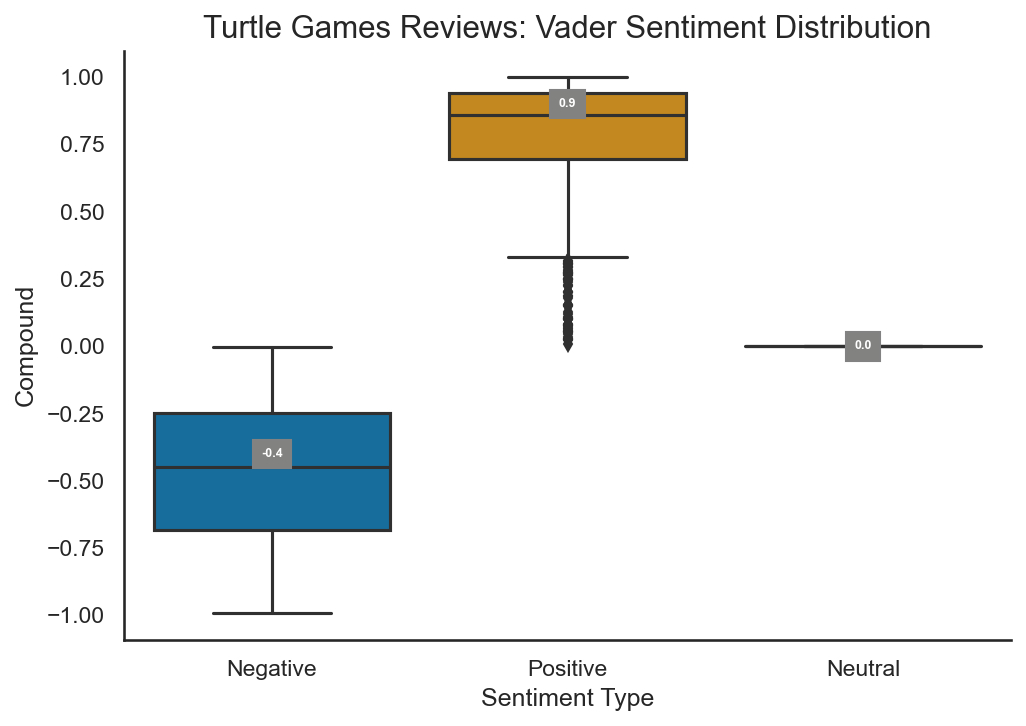

In [142]:
# Define figure.
fig, ax = plt.subplots(figsize = (7, 5),
                       dpi = 150)

# Create boxplot.
box_plot = sns.boxplot(x = 'type', y = 'compound',
            palette = 'colorblind',
            data = rv)

# Format figure attributes.
plt.title('Turtle Games Reviews: Vader Sentiment Distribution',
          fontsize = 15)
plt.xlabel('Sentiment Type', fontsize = 12)
plt.ylabel('Compound', fontsize = 12)
sns.despine()
sns.set(style = "white")

# Annotate with median compound scores.
ax = box_plot.axes
lines = ax.get_lines()
categories = ax.get_xticks()

for cat in categories:
    y = round(lines[4 + cat * 6].get_ydata()[0], 1) 

    ax.text(cat, y, f'{y}', ha = 'center', 
        va = 'center', fontweight = 'bold', 
        size = 6, color = 'white',
        bbox = dict(facecolor = '#828280', edgecolor = '#828282'))

# View plot.
box_plot.figure.tight_layout()

# Save the plot.
fig.savefig('Turtle Games Reviews: Vader Sentiment Distribution.jpg')

- We can see the **negative** reviews have a median of **-0.4** with reviews ranging from mild to moderate dissatisfaction, according to the `Vader` model.


- The **positive** reviews have a smaller range with a median of **0.9**, indicating that most positive reviews were very positive.